# Evaluation of all models

**Comparison of all models**:

**ML:**
- Logistic Regression
- Random Forest
- Support Vector Machine
- Deep Neural Network (Multilayer Perceptron)
- Naive Bayes
- K-Nearest Neighbors

**LLMs:**
- GPT (OpenAI)
- Gemini
- Gemma
- Claude
- DeepSeek
- Grok

## 0 Imports

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import holoviews as hv
import plotly.graph_objects as go
from holoviews import opts
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score, auc, roc_curve
from sklearn.model_selection import train_test_split

In [97]:
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)
data_change_excl = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change_excl.csv", sep = ",", low_memory = False)

In [98]:
# read "dat/dips/indices_k1_not_space.txt" file
with open("../dat/dips/indices_k1_not_space.txt", "r") as f:
    indices = [int(line.strip()) for line in f.readlines()]

In [99]:
y_pred_lr = pd.read_csv("01_ML/y_pred_ML/y_pred_lr.csv", sep =",")
y_pred_lr_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_lr_excl.csv", sep =",")
y_pred_rf = pd.read_csv("01_ML/y_pred_ML/y_pred_rf.csv", sep =",")
y_pred_svc = pd.read_csv("01_ML/y_pred_ML/y_pred_svc.csv", sep =",")
y_pred_dnn = pd.read_csv("01_ML/y_pred_ML/y_pred_dnn.csv", sep =",")
y_pred_knn = pd.read_csv("01_ML/y_pred_ML/y_pred_knn.csv", sep =",")
y_pred_knn_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_knn_excl.csv", sep =",")
y_pred_nb = pd.read_csv("01_ML/y_pred_ML/y_pred_nb.csv", sep =",")
y_pred_nb_excl = pd.read_csv("01_ML/y_pred_ML/y_pred_nb_excl.csv", sep =",")

In [100]:
y_pred_GPT_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_simple_prompt.csv", sep =",")
y_pred_GPT_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_class_definitions_prompt.csv", sep =",")
y_pred_GPT_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_few_shot_prompt.csv", sep =",")
y_pred_GPT_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_vignette_prompt.csv", sep =",")
y_pred_GPT_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_4_cot_prompt.csv", sep =",")

In [101]:
y_pred_GPT_o3_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_simple_prompt.csv", sep =",")
y_pred_GPT_o3_class_definitions_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_class_definitions_prompt.csv", sep =",")
y_pred_GPT_o3_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_profiled_simple_prompt.csv", sep =",")
y_pred_GPT_o3_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_few_shot_prompt.csv", sep =",")
y_pred_GPT_o3_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_vignette_prompt.csv", sep =",")
y_pred_GPT_o3_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/GPT/y_pred_GPT_o3_cot_prompt.csv", sep =",")

In [102]:
y_pred_Gemini_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_simple_prompt.csv", sep =",")
y_pred_Gemini_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_class_definitions_prompt.csv", sep =",")
y_pred_Gemini_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_profiled_simple_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt.csv", sep =",")
y_pred_Gemini_few_shot_prompt_10 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_10.csv", sep =",")
y_pred_Gemini_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_20.csv", sep =",")
y_pred_Gemini_few_shot_prompt_50 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_50.csv", sep =",")
y_pred_Gemini_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_few_shot_prompt_100.csv", sep =",")
y_pred_Gemini_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_vignette_prompt.csv", sep =",")
y_pred_Gemini_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_cot_prompt.csv", sep =",")
y_pred_Gemini_pred_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemini/y_pred_gemini_pred_def_prompt.csv", sep =",")

In [103]:
y_pred_Gemma_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_simple_prompt.csv", sep =",")
y_pred_Gemma_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_class_definitions_prompt.csv", sep =",")
y_pred_Gemma_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_profiled_simple_prompt.csv", sep =",")
y_pred_Gemma_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_few_shot_prompt.csv", sep =",")
y_pred_Gemma_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_vignette_prompt.csv", sep =",")
y_pred_Gemma_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_cot_prompt.csv", sep =",")
y_pred_Gemma_pred_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Gemma/y_pred_gemma_pred_def_prompt.csv", sep =",")

In [104]:
y_pred_Claude_4_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_simple_prompt.csv", sep =",")
y_pred_Claude_4_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_class_definitions_prompt.csv", sep =",")
y_pred_Claude_4_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/Claude/y_pred_claude_profiled_simple_prompt.csv", sep =",")
y_pred_Claude_4_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_few_shot_prompt.csv", sep =",")
y_pred_Claude_4_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_vignette_prompt.csv", sep =",")
y_pred_Claude_4_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Claude/y_pred_claude_cot_prompt.csv", sep =",")

In [105]:
y_pred_DeepSeek_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_simple_prompt.csv", sep =",")
y_pred_DeepSeek_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_class_definitions_prompt.csv", sep =",")
y_pred_DeepSeek_profiled_simple_prompt = pd.read_csv(
    "02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_profiled_simple_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_20.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt.csv", sep =",")
y_pred_DeepSeek_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_few_shot_prompt_100.csv", sep =",")
y_pred_DeepSeek_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_vignette_prompt.csv", sep =",")
y_pred_DeepSeek_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/DeepSeek/y_pred_deeps_cot_prompt.csv", sep =",")

In [106]:
y_pred_Grok_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_simple_prompt.csv", sep =",")
y_pred_Grok_class_def_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_class_definitions_prompt.csv", sep =",")
y_pred_Grok_profiled_simple_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_profiled_simple_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt.csv", sep =",")
y_pred_Grok_few_shot_prompt_20 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_20.csv", sep =",")
y_pred_Grok_few_shot_prompt_100 = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_few_shot_prompt_100.csv", sep =",")
y_pred_Grok_vignette_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_vignette_prompt.csv", sep =",")
y_pred_Grok_cot_prompt = pd.read_csv("02_LLM/y_pred_LLMs/Grok/y_pred_Grok_cot_prompt.csv", sep =",")

### Unification Approaches

In [107]:
y_pred_pov_all_models = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_all_models.csv", sep =",")
y_pred_pov_ml_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_ml_models.csv", sep =",")
y_pred_pov_llm_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_llm_models.csv", sep =",")
y_pred_pov_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_simple_models.csv", sep =",")
y_pred_pov_class_definitions_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_class_definitions_models.csv", sep =",")
y_pred_pov_profiled_simple_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_profiled_simple_models.csv", sep =",")
y_pred_pov_few_shot_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_few_shot_models.csv", sep =",")
y_pred_pov_vignette_votes = pd.read_csv(
    "04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_vignette_models.csv", sep =",")
y_pred_pov_cot_votes = pd.read_csv("04_Unification/y_pred_unification/proportion_of_votes/y_pred_pov_cot_models.csv", sep =",")

In [108]:
y_pred_best_LLM_or_best_ML = pd.read_csv(
    "04_Unification/y_pred_unification/OR_unification/y_pred_best_LLM_or_best_ML.csv", sep = ",")
y_pred_OR_best_LLMs = pd.read_csv(
    "04_Unification/y_pred_unification/OR_unification/y_pred_OR_best_LLMs.csv", sep = ",")

In [109]:
y_pred_new_input_dnn = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_dnn_X_train.csv", sep = ",")
y_pred_new_input_svc = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc_X_train.csv", sep =",")
y_pred_new_input_nb = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_nb_X_train.csv", sep =",")
# y_pred_new_input_svc_2 = pd.read_csv("04_Unification/y_pred_unification/new_input/y_pred_new_input_svc_all.csv", sep =",")


# 1 Metrics

In [110]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [111]:
# Predictors
X_excl = data_change_excl
X_excl = X_excl.drop(["hpi"], axis = 1)

# Target
y_excl = data_change_excl["hpi"]

# Train-test split
X_train_excl, X_test_excl, y_train_excl, y_test_excl = train_test_split(X_excl, y_excl, test_size = 0.2, random_state = 42, stratify = y_excl)

print("X_train shape: ", X_train_excl.shape, round(X_train_excl.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test_excl.shape, round(X_test_excl.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train_excl.shape, round(y_train_excl.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test_excl.shape, round(y_test_excl.shape[0]/len(y), 2), "\n")

X_train shape:  (785, 23) 0.64 
 X_test shape:  (197, 23) 0.16 
 y_train shape:  (785,) 0.64 
 y_test shape:  (197,) 0.16 



In [112]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel().tolist()

    # cm = confusion_matrix(y_test, y_pred)
    # precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    # recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])
    #
    # sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    # specificity = cm[0,0]/(cm[0,0]+cm[0,1])

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    recall = tp / (tp + fn)
    precision = tp / (tp + fp)


    fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)
    roc_auc = auc(fpr, tpr)

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall,
        "sensitivity": sensitivity,
        "specificity": specificity,
        "roc_auc": roc_auc
    }

    return metrics

In [113]:
# calculate metrics for all models
metrics_lr = calculate_metrics(y_test, y_pred_lr)
metrics_lr_excl = calculate_metrics(y_test_excl, y_pred_lr_excl)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)
metrics_knn_excl = calculate_metrics(y_test_excl, y_pred_knn_excl)
metrics_nb = calculate_metrics(y_test, y_pred_nb)
metrics_nb_excl = calculate_metrics(y_test_excl, y_pred_nb_excl)

In [114]:
metrics_GPT_simple_prompt = calculate_metrics(y_test, y_pred_GPT_simple_prompt)
metrics_GPT_class_def_prompt = calculate_metrics(y_test, y_pred_GPT_class_def_prompt)
metrics_GPT_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_profiled_simple_prompt)
metrics_GPT_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_few_shot_prompt)
metrics_GPT_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_vignette_prompt)
metrics_GPT_cot_prompt = calculate_metrics(y_test, y_pred_GPT_cot_prompt["y_pred"])

In [115]:
metrics_GPT_o3_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_simple_prompt["y_pred"])
metrics_GPT_o3_class_definitions_prompt = calculate_metrics(y_test, y_pred_GPT_o3_class_definitions_prompt["y_pred"])
metrics_GPT_o3_profiled_simple_prompt = calculate_metrics(y_test, y_pred_GPT_o3_profiled_simple_prompt["y_pred"])
metrics_GPT_o3_vignette_prompt = calculate_metrics(y_test, y_pred_GPT_o3_vignette_prompt["y_pred"])
metrics_GPT_o3_few_shot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_few_shot_prompt["y_pred"])
metrics_GPT_o3_cot_prompt = calculate_metrics(y_test, y_pred_GPT_o3_cot_prompt["y_pred"])

In [116]:
metrics_Gemini_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_simple_prompt["y_pred"])
metrics_Gemini_class_def_prompt = calculate_metrics(y_test, y_pred_Gemini_class_def_prompt["y_pred"])
metrics_Gemini_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemini_profiled_simple_prompt["y_pred"])
metrics_Gemini_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt["y_pred"])
metrics_Gemini_few_shot_prompt_10 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_10["y_pred"])
metrics_Gemini_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_20["y_pred"])
metrics_Gemini_few_shot_prompt_50 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_50["y_pred"])
metrics_Gemini_few_shot_prompt_100 = calculate_metrics(y_test, y_pred_Gemini_few_shot_prompt_100["y_pred"])
metrics_Gemini_vignette_prompt = calculate_metrics(y_test, y_pred_Gemini_vignette_prompt["y_pred"])
metrics_Gemini_cot_prompt = calculate_metrics(y_test, y_pred_Gemini_cot_prompt["y_pred"])
metrics_Gemini_pred_def_prompt = calculate_metrics(y_test, y_pred_Gemini_pred_def_prompt["y_pred"])

In [117]:
metrics_Gemma_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_simple_prompt["y_pred"])
metrics_Gemma_class_def_prompt = calculate_metrics(y_test, y_pred_Gemma_class_def_prompt["y_pred"])
metrics_Gemma_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Gemma_profiled_simple_prompt["y_pred"])
metrics_Gemma_few_shot_prompt = calculate_metrics(y_test, y_pred_Gemma_few_shot_prompt["y_pred"])
metrics_Gemma_vignette_prompt = calculate_metrics(y_test, y_pred_Gemma_vignette_prompt["y_pred"])
metrics_Gemma_cot_prompt = calculate_metrics(y_test, y_pred_Gemma_cot_prompt["y_pred"])
metrics_Gemma_pred_def_prompt = calculate_metrics(y_test, y_pred_Gemma_pred_def_prompt["y_pred"])

In [118]:
metrics_Claude_4_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_simple_prompt["y_pred"])
metrics_Claude_4_class_def_prompt = calculate_metrics(y_test, y_pred_Claude_4_class_def_prompt["y_pred"])
metrics_Claude_4_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Claude_4_profiled_simple_prompt["y_pred"])
metrics_Claude_4_few_shot_prompt = calculate_metrics(y_test, y_pred_Claude_4_few_shot_prompt["y_pred"])
metrics_Claude_4_vignette_prompt = calculate_metrics(y_test, y_pred_Claude_4_vignette_prompt["y_pred"])
metrics_Claude_4_cot_prompt = calculate_metrics(y_test, y_pred_Claude_4_cot_prompt["y_pred"])

In [119]:
metrics_DeepSeek_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_simple_prompt["y_pred"])
metrics_DeepSeek_class_def_prompt = calculate_metrics(y_test, y_pred_DeepSeek_class_def_prompt["y_pred"])
metrics_DeepSeek_profiled_simple_prompt = calculate_metrics(y_test, y_pred_DeepSeek_profiled_simple_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt["y_pred"])
metrics_DeepSeek_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt_20["y_pred"])
metrics_DeepSeek_few_shot_prompt_100 = calculate_metrics(y_test, y_pred_DeepSeek_few_shot_prompt_100["y_pred"])
metrics_DeepSeek_vignette_prompt = calculate_metrics(y_test, y_pred_DeepSeek_vignette_prompt["y_pred"])
metrics_DeepSeek_cot_prompt = calculate_metrics(y_test, y_pred_DeepSeek_cot_prompt["y_pred"])

In [120]:
metrics_Grok_simple_prompt = calculate_metrics(y_test, y_pred_Grok_simple_prompt)
metrics_Grok_class_def_prompt = calculate_metrics(y_test, y_pred_Grok_class_def_prompt)
metrics_Grok_profiled_simple_prompt = calculate_metrics(y_test, y_pred_Grok_profiled_simple_prompt)
metrics_Grok_few_shot_prompt = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt)
metrics_Grok_few_shot_prompt_20 = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt_20)
metrics_Grok_few_shot_prompt_100 = calculate_metrics(y_test, y_pred_Grok_few_shot_prompt_100)
metrics_Grok_vignette_prompt = calculate_metrics(y_test, y_pred_Grok_vignette_prompt)
metrics_Grok_cot_prompt = calculate_metrics(y_test, y_pred_Grok_cot_prompt["y_pred"])

#### Unification Approaches

In [121]:
metrics_pov_all_models = calculate_metrics(y_test, y_pred_pov_all_models["y_pred"])
metrics_pov_ml_votes = calculate_metrics(y_test, y_pred_pov_ml_votes["y_pred"])
metrics_pov_llm_votes = calculate_metrics(y_test, y_pred_pov_llm_votes["y_pred"])
metrics_pov_simple_votes = calculate_metrics(y_test, y_pred_pov_simple_votes["y_pred"])
metrics_pov_class_definitions_votes = calculate_metrics(y_test, y_pred_pov_class_definitions_votes["y_pred"])
metrics_pov_profiled_simple_votes = calculate_metrics(y_test, y_pred_pov_profiled_simple_votes["y_pred"])
metrics_pov_few_shot_votes = calculate_metrics(y_test, y_pred_pov_few_shot_votes["y_pred"])
metrics_pov_vignette_votes = calculate_metrics(y_test, y_pred_pov_vignette_votes["y_pred"])
metrics_pov_cot_votes = calculate_metrics(y_test, y_pred_pov_cot_votes["y_pred"])

In [122]:
metrics_best_LLM_or_best_ML = calculate_metrics(y_test, y_pred_best_LLM_or_best_ML["y_pred"])
metrics_OR_best_LLMs = calculate_metrics(y_test, y_pred_OR_best_LLMs["y_pred"])

In [123]:
metrics_new_input_dnn = calculate_metrics(y_test, y_pred_new_input_dnn["y_pred"])
metrics_new_input_svc = calculate_metrics(y_test, y_pred_new_input_svc["y_pred"])
metrics_new_input_nb = calculate_metrics(y_test, y_pred_new_input_nb["y_pred"])
# metrics_new_input_svc_2 = calculate_metrics(y_test, y_pred_new_input_svc_2["y_pred"])

In [124]:
# print auc for all models
print("AUC for Logistic Regression: ", metrics_lr["roc_auc"])

AUC for Logistic Regression:  0.5675509702775731


# 2 Visualize Metrics

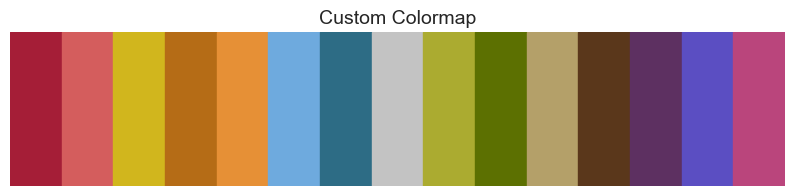

In [125]:
# define colors for the models

# base colors of QDS
base_colors = {
    "red": (165/255, 30/255, 55/255),
    "gray": (195/255, 195/255, 195/255),
    "lightgray": (203/255, 203/255, 203/255),
    "gold": (180/255, 160/255, 105/255),
}

hex_colors = [
    "#A51E37", "#D45D5D", "#D1B61D", "#B56C16", "#E69036",
    "#6EAADE", "#2D6C85", "#C3C3C3", "#ABAB30", "#5C7001",
    "#B4A069", "#5A371B", "#5D3061", "#5B4EC2", "#BA457C"
]

# Create a ListedColormap
custom_cmap = ListedColormap(hex_colors, name = "custom15")


# Visualize the colors
fig, ax = plt.subplots(figsize=(10, 2))
for i, color in enumerate(hex_colors):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))
ax.set_xlim(0, len(hex_colors))
ax.set_ylim(0, 1)
ax.axis("off")
plt.title("Custom Colormap", fontsize=14)
plt.show()

## ML Models

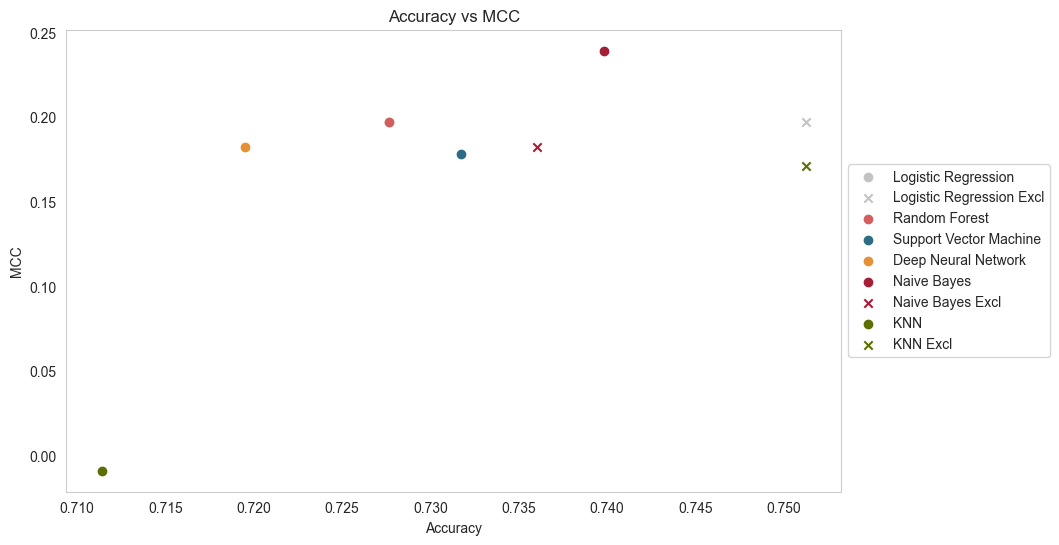

In [126]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_lr_excl["accuracy"], metrics_lr_excl["mcc"], label = "Logistic Regression Excl", color = hex_colors[7], marker = "x")
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_nb_excl["accuracy"], metrics_nb_excl["mcc"], label = "Naive Bayes Excl", color = hex_colors[0], marker = "x")
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_knn_excl["accuracy"], metrics_knn_excl["mcc"], label = "KNN Excl", color = hex_colors[9], marker = "x")

# plt.xlim(0, 1)
# plt.ylim(-1, 1)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()
# plt.show()

# save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_ML.png", dpi = 300, bbox_inches = "tight")

In [155]:
metrics_nb_excl

{'accuracy': 0.7360406091370558,
 'macro_f1': 0.5667472468439431,
 'micro_f1': 0.7360406091370558,
 'mcc': np.float64(0.18209009660000677),
 'precision': 0.4782608695652174,
 'recall': 0.21568627450980393,
 'sensitivity': 0.21568627450980393,
 'specificity': 0.9178082191780822,
 'roc_auc': np.float64(0.5667472468439432)}

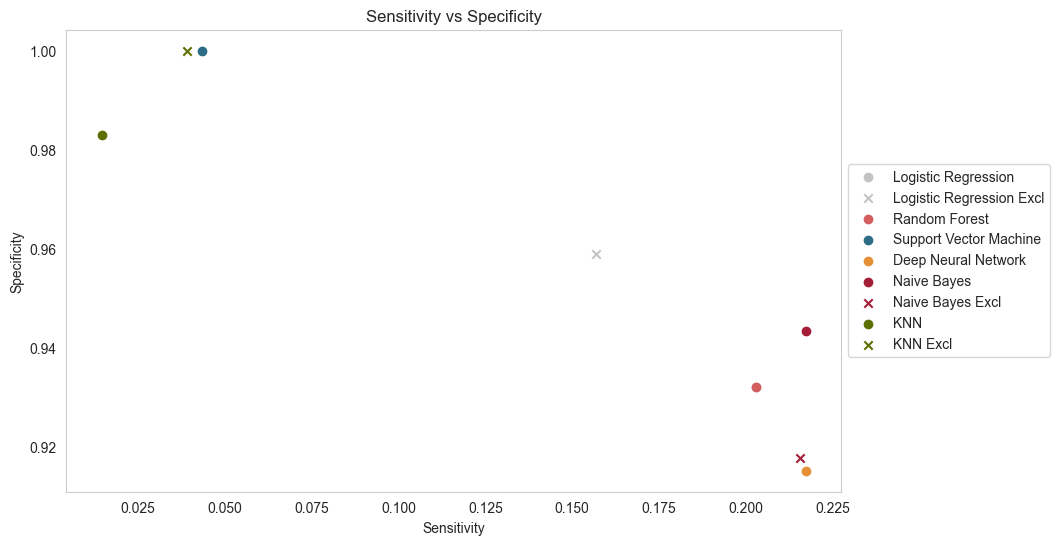

In [127]:
# sensitivity vs specificity
plt.figure(figsize = (10, 6))

plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_lr_excl["sensitivity"], metrics_lr_excl["specificity"], label = "Logistic Regression Excl", color = hex_colors[7], marker = "x")
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_nb_excl["sensitivity"], metrics_nb_excl["specificity"], label = "Naive Bayes Excl", color = hex_colors[0], marker = "x")
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])
plt.scatter(metrics_knn_excl["sensitivity"], metrics_knn_excl["specificity"], label = "KNN Excl", color = hex_colors[9], marker = "x")

# plt.xlim(0, 1)
# plt.ylim(0, 1)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_ML.png", dpi = 300, bbox_inches = "tight")

**Sensitivity** = Wie viel Prozent der predicted positives sind wirklich positiv. Wie viele der tatsächlich kranken Personen hat das Model erkannt?

**Specificity** = Wie viel Prozent der predicted negatives sind wirklich negativ. Wie viele der tatsächlich gesunden Personen hat das Model richtig ausgeschlossen (negativ predicted)?

## LLMs

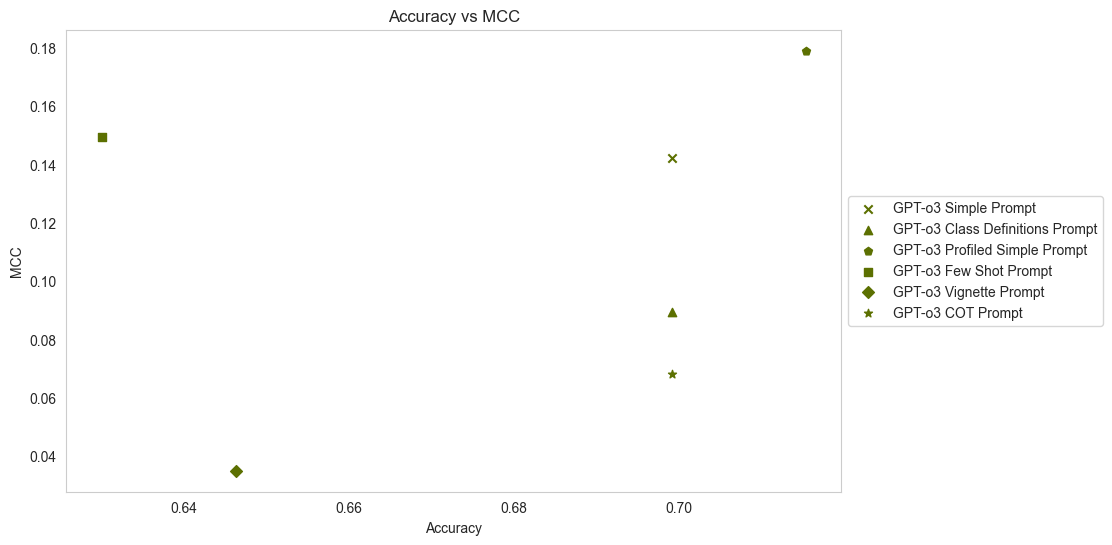

In [128]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

# plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[9], marker = "x")
# plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[9], marker = "^")
# plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
# plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[9], marker = "s")
# plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[9], marker = "D")
# plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

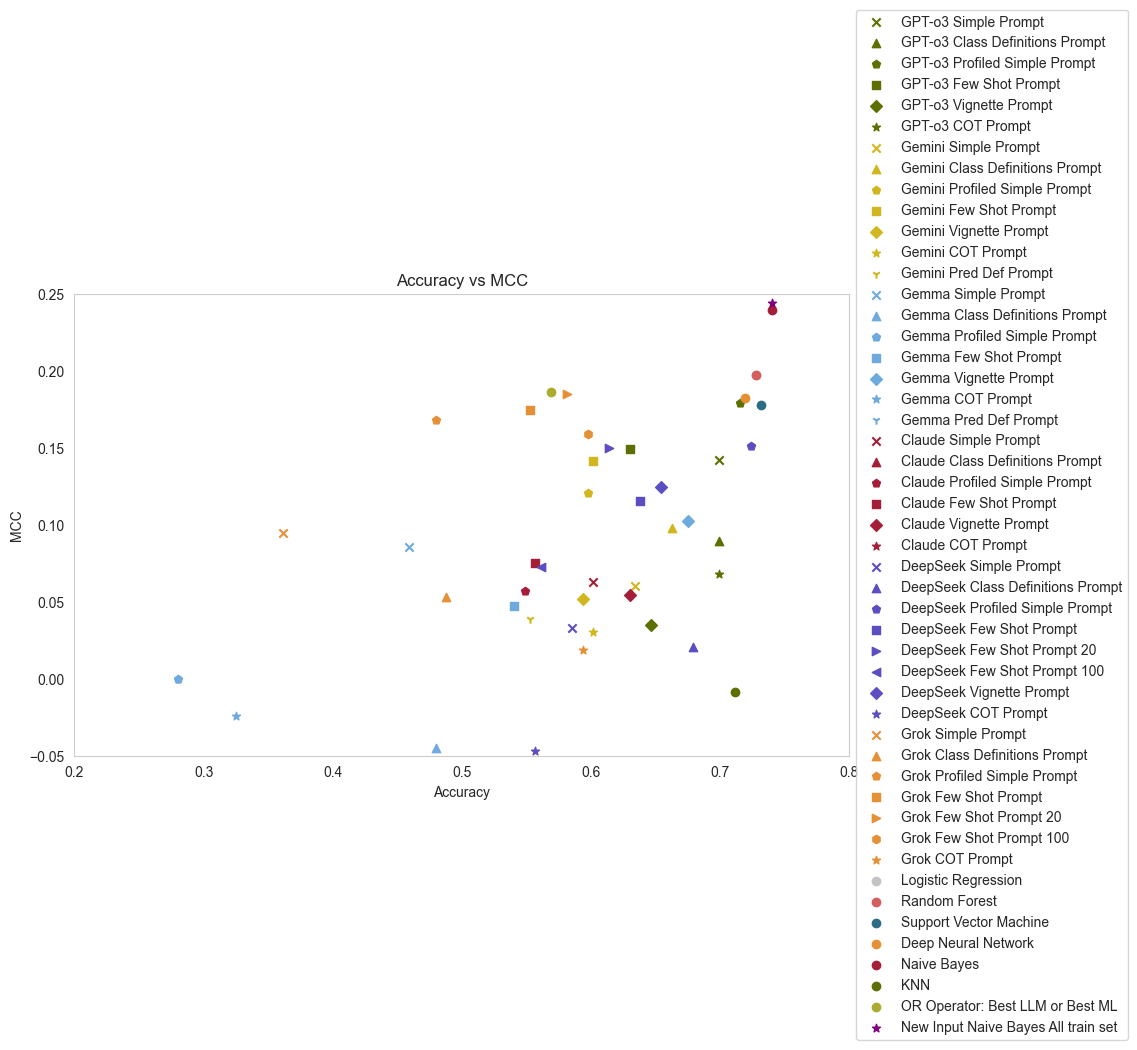

In [154]:
# plot all simple prompts for LLMs: MCC vs Accuracy
plt.figure(figsize = (10, 6))

# plt.scatter(metrics_GPT_simple_prompt["accuracy"], metrics_GPT_simple_prompt["mcc"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
# plt.scatter(metrics_GPT_class_def_prompt["accuracy"], metrics_GPT_class_def_prompt["mcc"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
# plt.scatter(metrics_GPT_profiled_simple_prompt["accuracy"], metrics_GPT_profiled_simple_prompt["mcc"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
# plt.scatter(metrics_GPT_few_shot_prompt["accuracy"], metrics_GPT_few_shot_prompt["mcc"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
# plt.scatter(metrics_GPT_vignette_prompt["accuracy"], metrics_GPT_vignette_prompt["mcc"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
# plt.scatter(metrics_GPT_cot_prompt["accuracy"], metrics_GPT_cot_prompt["mcc"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["accuracy"], metrics_GPT_o3_simple_prompt["mcc"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["accuracy"], metrics_GPT_o3_class_definitions_prompt["mcc"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["accuracy"], metrics_GPT_o3_profiled_simple_prompt["mcc"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["accuracy"], metrics_GPT_o3_few_shot_prompt["mcc"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["accuracy"], metrics_GPT_o3_vignette_prompt["mcc"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["accuracy"], metrics_GPT_o3_cot_prompt["mcc"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["accuracy"], metrics_Gemini_simple_prompt["mcc"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["accuracy"], metrics_Gemini_class_def_prompt["mcc"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["accuracy"], metrics_Gemini_profiled_simple_prompt["mcc"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["accuracy"], metrics_Gemini_few_shot_prompt["mcc"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
# plt.scatter(metrics_Gemini_few_shot_prompt_10["accuracy"], metrics_Gemini_few_shot_prompt_10["mcc"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
# plt.scatter(metrics_Gemini_few_shot_prompt_20["accuracy"], metrics_Gemini_few_shot_prompt_20["mcc"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
# plt.scatter(metrics_Gemini_few_shot_prompt_50["accuracy"], metrics_Gemini_few_shot_prompt_50["mcc"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
# plt.scatter(metrics_Gemini_few_shot_prompt_100["accuracy"], metrics_Gemini_few_shot_prompt_100["mcc"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["accuracy"], metrics_Gemini_vignette_prompt["mcc"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["accuracy"], metrics_Gemini_cot_prompt["mcc"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")
plt.scatter(metrics_Gemini_pred_def_prompt["accuracy"], metrics_Gemini_pred_def_prompt["mcc"], label = "Gemini Pred Def Prompt", color = hex_colors[2], marker = "1")

plt.scatter(metrics_Gemma_simple_prompt["accuracy"], metrics_Gemma_simple_prompt["mcc"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["accuracy"], metrics_Gemma_class_def_prompt["mcc"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["accuracy"], metrics_Gemma_profiled_simple_prompt["mcc"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["accuracy"], metrics_Gemma_few_shot_prompt["mcc"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["accuracy"], metrics_Gemma_vignette_prompt["mcc"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["accuracy"], metrics_Gemma_cot_prompt["mcc"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")
plt.scatter(metrics_Gemma_pred_def_prompt["accuracy"], metrics_Gemma_pred_def_prompt["mcc"], label = "Gemma Pred Def Prompt", color = hex_colors[5], marker = "1")

plt.scatter(metrics_Claude_4_simple_prompt["accuracy"], metrics_Claude_4_simple_prompt["mcc"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["accuracy"], metrics_Claude_4_class_def_prompt["mcc"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["accuracy"], metrics_Claude_4_profiled_simple_prompt["mcc"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["accuracy"], metrics_Claude_4_few_shot_prompt["mcc"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["accuracy"], metrics_Claude_4_vignette_prompt["mcc"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["accuracy"], metrics_Claude_4_cot_prompt["mcc"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["accuracy"], metrics_DeepSeek_simple_prompt["mcc"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["accuracy"], metrics_DeepSeek_class_def_prompt["mcc"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["accuracy"], metrics_DeepSeek_profiled_simple_prompt["mcc"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["accuracy"], metrics_DeepSeek_few_shot_prompt["mcc"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["accuracy"], metrics_DeepSeek_few_shot_prompt_20["mcc"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt_100["accuracy"], metrics_DeepSeek_few_shot_prompt_100["mcc"], label = "DeepSeek Few Shot Prompt 100", color = hex_colors[13], marker = "<")
plt.scatter(metrics_DeepSeek_vignette_prompt["accuracy"], metrics_DeepSeek_vignette_prompt["mcc"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["accuracy"], metrics_DeepSeek_cot_prompt["mcc"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["accuracy"], metrics_Grok_simple_prompt["mcc"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["accuracy"], metrics_Grok_class_def_prompt["mcc"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["accuracy"], metrics_Grok_profiled_simple_prompt["mcc"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["accuracy"], metrics_Grok_few_shot_prompt["mcc"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["accuracy"], metrics_Grok_few_shot_prompt_20["mcc"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["accuracy"], metrics_Grok_few_shot_prompt_100["mcc"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "h")
# plt.scatter(metrics_Grok_vignette_prompt["accuracy"], metrics_Grok_vignette_prompt["mcc"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["accuracy"], metrics_Grok_cot_prompt["mcc"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["accuracy"], metrics_lr["mcc"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["accuracy"], metrics_nb["mcc"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = hex_colors[9])


plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
# # plt.scatter(metrics_OR_best_LLMs["accuracy"], metrics_OR_best_LLMs["mcc"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")
#
#
# plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_llm_votes["accuracy"], metrics_pov_llm_votes["mcc"], label = "POV LLM Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "POV Profiled Simple Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "POV COT Votes", color = "black", marker = "*")


# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["accuracy"], metrics_new_input_nb["mcc"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.xlim(0.2, 0.8)
plt.ylim(-0.05, 0.25)

# plt.xlim(0, 1.02)
# plt.ylim(-1.02, 1.02)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_all_models.png", dpi = 300, bbox_inches = "tight")
# plt.savefig("../doc/figs/01_LLM_ML_performance/accuracy_mcc_LLMs_ML_0_1.png", dpi = 300, bbox_inches = "tight")

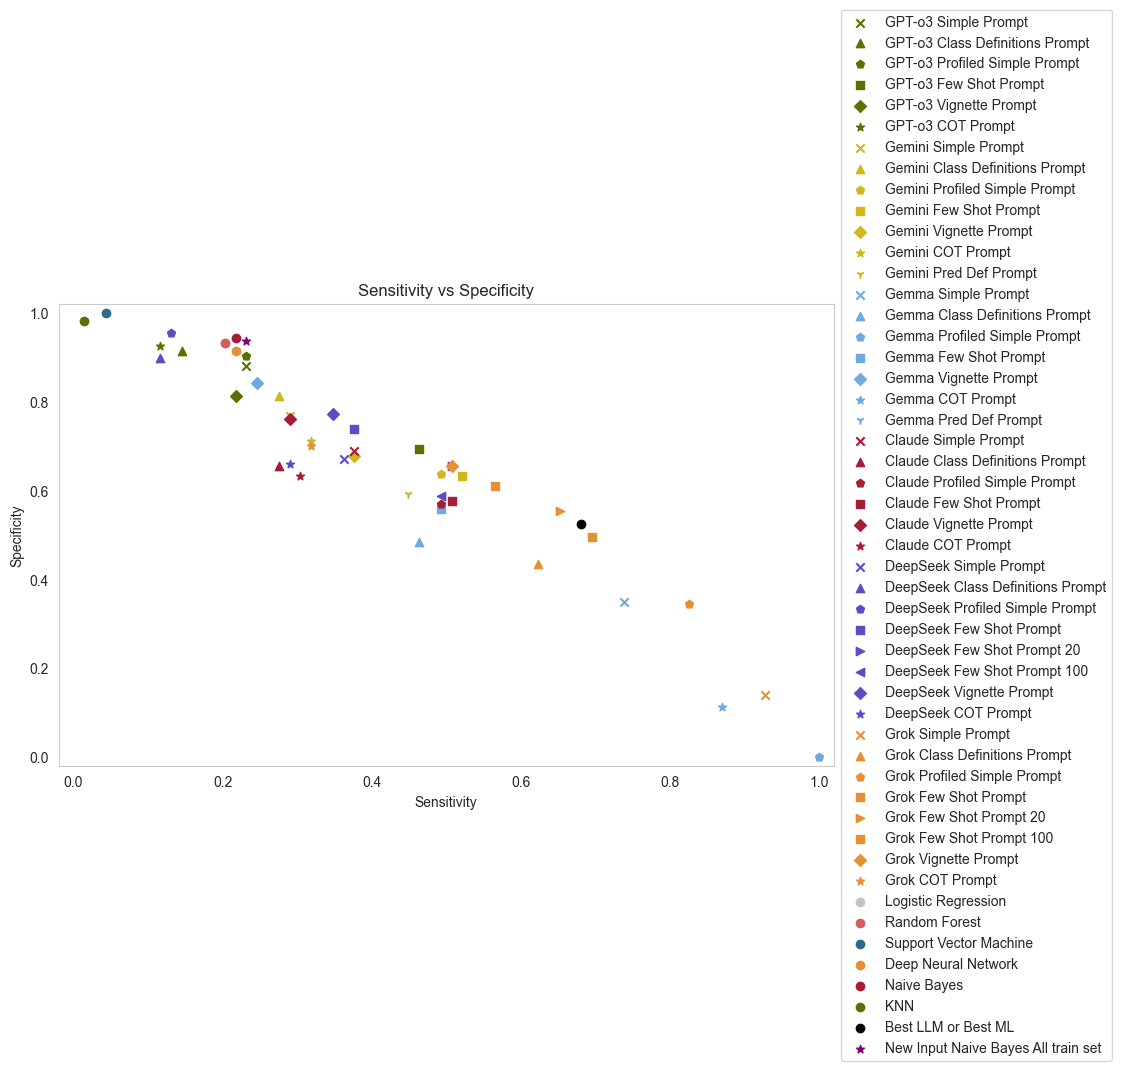

In [130]:
# plot sensitivity vs specificity for all simple prompts
plt.figure(figsize = (10, 6))

# plt.scatter(metrics_GPT_simple_prompt["sensitivity"], metrics_GPT_simple_prompt["specificity"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
# plt.scatter(metrics_GPT_class_def_prompt["sensitivity"], metrics_GPT_class_def_prompt["specificity"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
# plt.scatter(metrics_GPT_profiled_simple_prompt["sensitivity"], metrics_GPT_profiled_simple_prompt["specificity"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
# plt.scatter(metrics_GPT_few_shot_prompt["sensitivity"], metrics_GPT_few_shot_prompt["specificity"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
# plt.scatter(metrics_GPT_vignette_prompt["sensitivity"], metrics_GPT_vignette_prompt["specificity"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
# plt.scatter(metrics_GPT_cot_prompt["sensitivity"], metrics_GPT_cot_prompt["specificity"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["sensitivity"], metrics_GPT_o3_simple_prompt["specificity"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["sensitivity"], metrics_GPT_o3_class_definitions_prompt["specificity"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], metrics_GPT_o3_profiled_simple_prompt["specificity"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["sensitivity"], metrics_GPT_o3_few_shot_prompt["specificity"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["sensitivity"], metrics_GPT_o3_vignette_prompt["specificity"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["sensitivity"], metrics_GPT_o3_cot_prompt["specificity"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["sensitivity"], metrics_Gemini_simple_prompt["specificity"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["sensitivity"], metrics_Gemini_class_def_prompt["specificity"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["sensitivity"], metrics_Gemini_profiled_simple_prompt["specificity"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["sensitivity"], metrics_Gemini_few_shot_prompt["specificity"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
# plt.scatter(metrics_Gemini_few_shot_prompt_10["sensitivity"], metrics_Gemini_few_shot_prompt_10["specificity"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
# plt.scatter(metrics_Gemini_few_shot_prompt_20["sensitivity"], metrics_Gemini_few_shot_prompt_20["specificity"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
# plt.scatter(metrics_Gemini_few_shot_prompt_50["sensitivity"], metrics_Gemini_few_shot_prompt_50["specificity"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
# plt.scatter(metrics_Gemini_few_shot_prompt_100["sensitivity"], metrics_Gemini_few_shot_prompt_100["specificity"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["sensitivity"], metrics_Gemini_vignette_prompt["specificity"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["sensitivity"], metrics_Gemini_cot_prompt["specificity"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")
plt.scatter(metrics_Gemini_pred_def_prompt["sensitivity"], metrics_Gemini_pred_def_prompt["specificity"], label = "Gemini Pred Def Prompt", color = hex_colors[2], marker = "1")

plt.scatter(metrics_Gemma_simple_prompt["sensitivity"], metrics_Gemma_simple_prompt["specificity"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["sensitivity"], metrics_Gemma_class_def_prompt["specificity"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["sensitivity"], metrics_Gemma_profiled_simple_prompt["specificity"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["sensitivity"], metrics_Gemma_few_shot_prompt["specificity"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["sensitivity"], metrics_Gemma_vignette_prompt["specificity"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["sensitivity"], metrics_Gemma_cot_prompt["specificity"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")
plt.scatter(metrics_Gemma_pred_def_prompt["sensitivity"], metrics_Gemma_pred_def_prompt["specificity"], label = "Gemma Pred Def Prompt", color = hex_colors[5], marker = "1")

plt.scatter(metrics_Claude_4_simple_prompt["sensitivity"], metrics_Claude_4_simple_prompt["specificity"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["sensitivity"], metrics_Claude_4_class_def_prompt["specificity"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["sensitivity"], metrics_Claude_4_profiled_simple_prompt["specificity"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["sensitivity"], metrics_Claude_4_few_shot_prompt["specificity"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["sensitivity"], metrics_Claude_4_vignette_prompt["specificity"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["sensitivity"], metrics_Claude_4_cot_prompt["specificity"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["sensitivity"], metrics_DeepSeek_simple_prompt["specificity"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["sensitivity"], metrics_DeepSeek_class_def_prompt["specificity"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], metrics_DeepSeek_profiled_simple_prompt["specificity"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["sensitivity"], metrics_DeepSeek_few_shot_prompt["specificity"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["sensitivity"], metrics_DeepSeek_few_shot_prompt_20["specificity"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt_100["sensitivity"], metrics_DeepSeek_few_shot_prompt_100["specificity"], label = "DeepSeek Few Shot Prompt 100", color = hex_colors[13], marker = "<")
plt.scatter(metrics_DeepSeek_vignette_prompt["sensitivity"], metrics_DeepSeek_vignette_prompt["specificity"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["sensitivity"], metrics_DeepSeek_cot_prompt["specificity"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["sensitivity"], metrics_Grok_simple_prompt["specificity"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["sensitivity"], metrics_Grok_class_def_prompt["specificity"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["sensitivity"], metrics_Grok_profiled_simple_prompt["specificity"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["sensitivity"], metrics_Grok_few_shot_prompt["specificity"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["sensitivity"], metrics_Grok_few_shot_prompt_20["specificity"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["sensitivity"], metrics_Grok_few_shot_prompt_100["specificity"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["sensitivity"], metrics_Grok_vignette_prompt["specificity"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["sensitivity"], metrics_Grok_cot_prompt["specificity"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["sensitivity"], metrics_lr["specificity"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["sensitivity"], metrics_rf["specificity"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["sensitivity"], metrics_svc["specificity"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["sensitivity"], metrics_dnn["specificity"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["sensitivity"], metrics_nb["specificity"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["sensitivity"], metrics_knn["specificity"], label = "KNN", color = hex_colors[9])


# plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "POV All Models", color = "black", marker = "P")
# plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "POV ML Votes", color = "black", marker = "X")
# plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "POV Simple Votes", color = "black", marker = "x")
# plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "POV Class Definitions Votes", color = "black", marker = "^")
# plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "POV Profiled Simple Votes", color = "black", marker = "p")
# plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "POV Few Shot Votes", color = "black", marker = "s")
# plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "POV Vignette Votes", color = "black", marker = "D")
# plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "POV COT Votes", color = "black", marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "Best LLM or Best ML", color = "black", marker = "o")
#
# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input SVC", color = "green", marker = "o")
plt.scatter(metrics_new_input_nb["sensitivity"], metrics_new_input_nb["specificity"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
# plt.savefig("../doc/figs/01_LLM_ML_performance/sensitivity_specificity_LLMs.png", dpi = 300, bbox_inches = "tight")

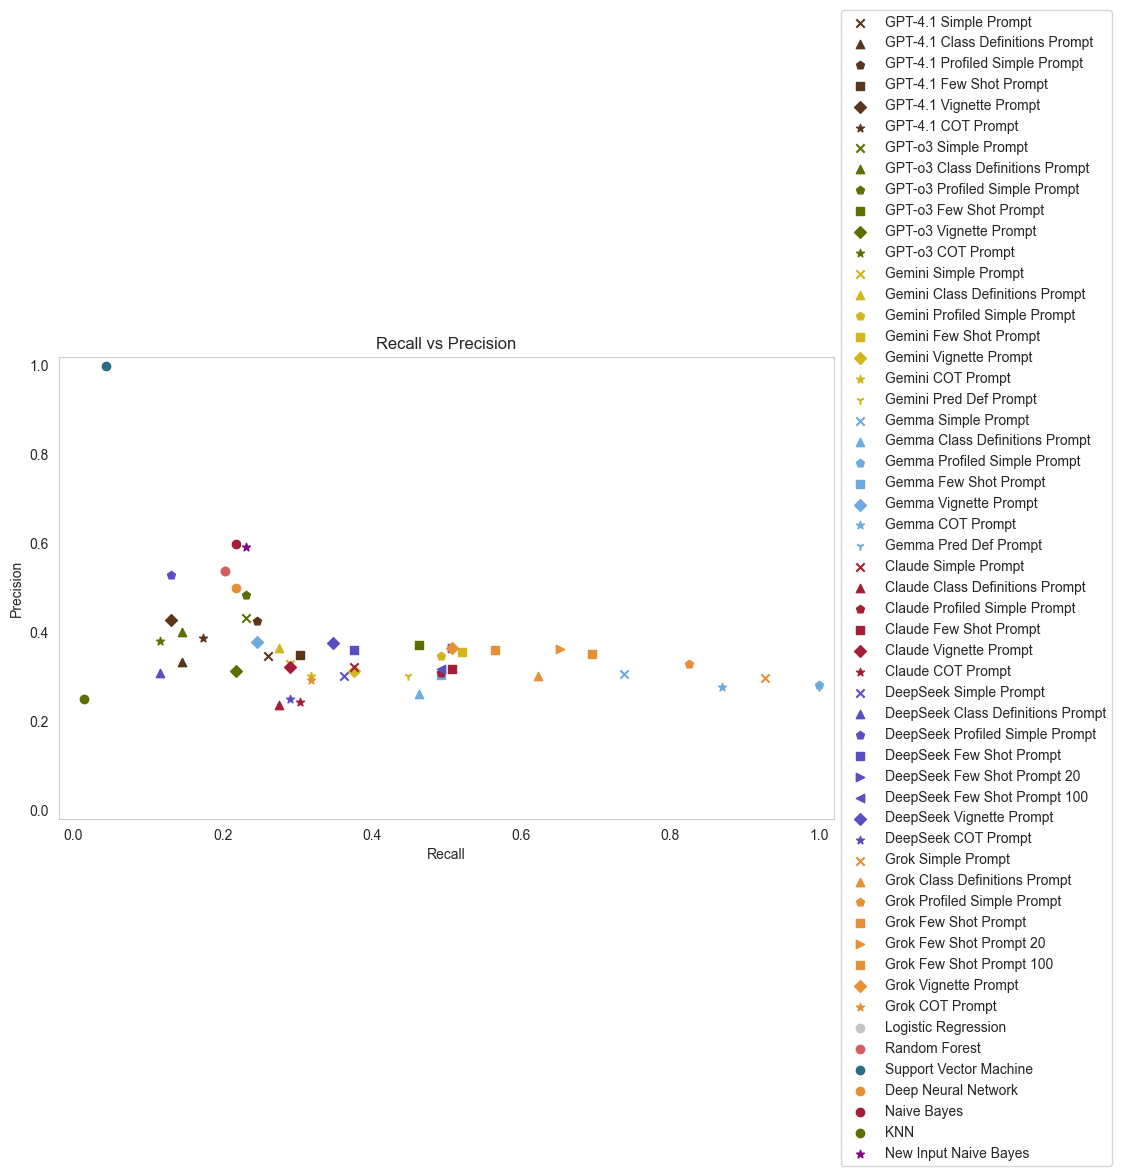

In [131]:
# recall vs precision
plt.figure(figsize = (10, 6))

plt.scatter(metrics_GPT_simple_prompt["recall"], metrics_GPT_simple_prompt["precision"], label = "GPT-4.1 Simple Prompt", color = hex_colors[11], marker = "x")
plt.scatter(metrics_GPT_class_def_prompt["recall"], metrics_GPT_class_def_prompt["precision"], label = "GPT-4.1 Class Definitions Prompt", color = hex_colors[11], marker = "^")
plt.scatter(metrics_GPT_profiled_simple_prompt["recall"], metrics_GPT_profiled_simple_prompt["precision"], label = "GPT-4.1 Profiled Simple Prompt", color = hex_colors[11], marker = "p")
plt.scatter(metrics_GPT_few_shot_prompt["recall"], metrics_GPT_few_shot_prompt["precision"], label = "GPT-4.1 Few Shot Prompt", color = hex_colors[11], marker = "s")
plt.scatter(metrics_GPT_vignette_prompt["recall"], metrics_GPT_vignette_prompt["precision"], label = "GPT-4.1 Vignette Prompt", color = hex_colors[11], marker = "D")
plt.scatter(metrics_GPT_cot_prompt["recall"], metrics_GPT_cot_prompt["precision"], label = "GPT-4.1 COT Prompt", color = hex_colors[11], marker = "*")

plt.scatter(metrics_GPT_o3_simple_prompt["recall"], metrics_GPT_o3_simple_prompt["precision"], label = "GPT-o3 Simple Prompt", color = hex_colors[9], marker = "x")
plt.scatter(metrics_GPT_o3_class_definitions_prompt["recall"], metrics_GPT_o3_class_definitions_prompt["precision"], label = "GPT-o3 Class Definitions Prompt", color = hex_colors[9], marker = "^")
plt.scatter(metrics_GPT_o3_profiled_simple_prompt["recall"], metrics_GPT_o3_profiled_simple_prompt["precision"], label = "GPT-o3 Profiled Simple Prompt", color = hex_colors[9], marker = "p")
plt.scatter(metrics_GPT_o3_few_shot_prompt["recall"], metrics_GPT_o3_few_shot_prompt["precision"], label = "GPT-o3 Few Shot Prompt", color = hex_colors[9], marker = "s")
plt.scatter(metrics_GPT_o3_vignette_prompt["recall"], metrics_GPT_o3_vignette_prompt["precision"], label = "GPT-o3 Vignette Prompt", color = hex_colors[9], marker = "D")
plt.scatter(metrics_GPT_o3_cot_prompt["recall"], metrics_GPT_o3_cot_prompt["precision"], label = "GPT-o3 COT Prompt", color = hex_colors[9], marker = "*")

plt.scatter(metrics_Gemini_simple_prompt["recall"], metrics_Gemini_simple_prompt["precision"], label = "Gemini Simple Prompt", color = hex_colors[2], marker = "x")
plt.scatter(metrics_Gemini_class_def_prompt["recall"], metrics_Gemini_class_def_prompt["precision"], label = "Gemini Class Definitions Prompt", color = hex_colors[2], marker = "^")
plt.scatter(metrics_Gemini_profiled_simple_prompt["recall"], metrics_Gemini_profiled_simple_prompt["precision"], label = "Gemini Profiled Simple Prompt", color = hex_colors[2], marker = "p")
plt.scatter(metrics_Gemini_few_shot_prompt["recall"], metrics_Gemini_few_shot_prompt["precision"], label = "Gemini Few Shot Prompt", color = hex_colors[2], marker = "s")
# plt.scatter(metrics_Gemini_few_shot_prompt_10["recall"], metrics_Gemini_few_shot_prompt_10["precision"], label = "Gemini Few Shot Prompt 10", color = hex_colors[2], marker = ">")
# plt.scatter(metrics_Gemini_few_shot_prompt_20["recall"], metrics_Gemini_few_shot_prompt_20["precision"], label = "Gemini Few Shot Prompt 20", color = hex_colors[2], marker = "h")
# plt.scatter(metrics_Gemini_few_shot_prompt_50["recall"], metrics_Gemini_few_shot_prompt_50["precision"], label = "Gemini Few Shot Prompt 50", color = hex_colors[2], marker = "<")
# plt.scatter(metrics_Gemini_few_shot_prompt_100["recall"], metrics_Gemini_few_shot_prompt_100["precision"], label = "Gemini Few Shot Prompt 100", color = hex_colors[2], marker = "v")
plt.scatter(metrics_Gemini_vignette_prompt["recall"], metrics_Gemini_vignette_prompt["precision"], label = "Gemini Vignette Prompt", color = hex_colors[2], marker = "D")
plt.scatter(metrics_Gemini_cot_prompt["recall"], metrics_Gemini_cot_prompt["precision"], label = "Gemini COT Prompt", color = hex_colors[2], marker = "*")
plt.scatter(metrics_Gemini_pred_def_prompt["recall"], metrics_Gemini_pred_def_prompt["precision"], label = "Gemini Pred Def Prompt", color = hex_colors[2], marker = "1")

plt.scatter(metrics_Gemma_simple_prompt["recall"], metrics_Gemma_simple_prompt["precision"], label = "Gemma Simple Prompt", color = hex_colors[5], marker = "x")
plt.scatter(metrics_Gemma_class_def_prompt["recall"], metrics_Gemma_class_def_prompt["precision"], label = "Gemma Class Definitions Prompt", color = hex_colors[5], marker = "^")
plt.scatter(metrics_Gemma_profiled_simple_prompt["recall"], metrics_Gemma_profiled_simple_prompt["precision"], label = "Gemma Profiled Simple Prompt", color = hex_colors[5], marker = "p")
plt.scatter(metrics_Gemma_few_shot_prompt["recall"], metrics_Gemma_few_shot_prompt["precision"], label = "Gemma Few Shot Prompt", color = hex_colors[5], marker = "s")
plt.scatter(metrics_Gemma_vignette_prompt["recall"], metrics_Gemma_vignette_prompt["precision"], label = "Gemma Vignette Prompt", color = hex_colors[5], marker = "D")
plt.scatter(metrics_Gemma_cot_prompt["recall"], metrics_Gemma_cot_prompt["precision"], label = "Gemma COT Prompt", color = hex_colors[5], marker = "*")
plt.scatter(metrics_Gemma_pred_def_prompt["recall"], metrics_Gemma_cot_prompt["precision"], label = "Gemma Pred Def Prompt", color = hex_colors[5], marker = "1")

plt.scatter(metrics_Claude_4_simple_prompt["recall"], metrics_Claude_4_simple_prompt["precision"], label = "Claude Simple Prompt", color = hex_colors[0], marker = "x")
plt.scatter(metrics_Claude_4_class_def_prompt["recall"], metrics_Claude_4_class_def_prompt["precision"], label = "Claude Class Definitions Prompt", color = hex_colors[0], marker = "^")
plt.scatter(metrics_Claude_4_profiled_simple_prompt["recall"], metrics_Claude_4_profiled_simple_prompt["precision"], label = "Claude Profiled Simple Prompt", color = hex_colors[0], marker = "p")
plt.scatter(metrics_Claude_4_few_shot_prompt["recall"], metrics_Claude_4_few_shot_prompt["precision"], label = "Claude Few Shot Prompt", color = hex_colors[0], marker = "s")
plt.scatter(metrics_Claude_4_vignette_prompt["recall"], metrics_Claude_4_vignette_prompt["precision"], label = "Claude Vignette Prompt", color = hex_colors[0], marker = "D")
plt.scatter(metrics_Claude_4_cot_prompt["recall"], metrics_Claude_4_cot_prompt["precision"], label = "Claude COT Prompt", color = hex_colors[0], marker = "*")

plt.scatter(metrics_DeepSeek_simple_prompt["recall"], metrics_DeepSeek_simple_prompt["precision"], label = "DeepSeek Simple Prompt", color = hex_colors[13], marker = "x")
plt.scatter(metrics_DeepSeek_class_def_prompt["recall"], metrics_DeepSeek_class_def_prompt["precision"], label = "DeepSeek Class Definitions Prompt", color = hex_colors[13], marker = "^")
plt.scatter(metrics_DeepSeek_profiled_simple_prompt["recall"], metrics_DeepSeek_profiled_simple_prompt["precision"], label = "DeepSeek Profiled Simple Prompt", color = hex_colors[13], marker = "p")
plt.scatter(metrics_DeepSeek_few_shot_prompt["recall"], metrics_DeepSeek_few_shot_prompt["precision"], label = "DeepSeek Few Shot Prompt", color = hex_colors[13], marker = "s")
plt.scatter(metrics_DeepSeek_few_shot_prompt_20["recall"], metrics_DeepSeek_few_shot_prompt_20["precision"], label = "DeepSeek Few Shot Prompt 20", color = hex_colors[13], marker = ">")
plt.scatter(metrics_DeepSeek_few_shot_prompt_100["recall"], metrics_DeepSeek_few_shot_prompt_100["precision"], label = "DeepSeek Few Shot Prompt 100", color = hex_colors[13], marker = "<")
plt.scatter(metrics_DeepSeek_vignette_prompt["recall"], metrics_DeepSeek_vignette_prompt["precision"], label = "DeepSeek Vignette Prompt", color = hex_colors[13], marker = "D")
plt.scatter(metrics_DeepSeek_cot_prompt["recall"], metrics_DeepSeek_cot_prompt["precision"], label = "DeepSeek COT Prompt", color = hex_colors[13], marker = "*")

plt.scatter(metrics_Grok_simple_prompt["recall"], metrics_Grok_simple_prompt["precision"], label = "Grok Simple Prompt", color = hex_colors[4], marker = "x")
plt.scatter(metrics_Grok_class_def_prompt["recall"], metrics_Grok_class_def_prompt["precision"], label = "Grok Class Definitions Prompt", color = hex_colors[4], marker = "^")
plt.scatter(metrics_Grok_profiled_simple_prompt["recall"], metrics_Grok_profiled_simple_prompt["precision"], label = "Grok Profiled Simple Prompt", color = hex_colors[4], marker = "p")
plt.scatter(metrics_Grok_few_shot_prompt["recall"], metrics_Grok_few_shot_prompt["precision"], label = "Grok Few Shot Prompt", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_few_shot_prompt_20["recall"], metrics_Grok_few_shot_prompt_20["precision"], label = "Grok Few Shot Prompt 20", color = hex_colors[4], marker = ">")
plt.scatter(metrics_Grok_few_shot_prompt_100["recall"], metrics_Grok_few_shot_prompt_100["precision"], label = "Grok Few Shot Prompt 100", color = hex_colors[4], marker = "s")
plt.scatter(metrics_Grok_vignette_prompt["recall"], metrics_Grok_vignette_prompt["precision"], label = "Grok Vignette Prompt", color = hex_colors[4], marker = "D")
plt.scatter(metrics_Grok_cot_prompt["recall"], metrics_Grok_cot_prompt["precision"], label = "Grok COT Prompt", color = hex_colors[4], marker = "*")

plt.scatter(metrics_lr["recall"], metrics_lr["precision"], label = "Logistic Regression", color = hex_colors[7])
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = hex_colors[1])
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = hex_colors[6])
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = hex_colors[4])
plt.scatter(metrics_nb["recall"], metrics_nb["precision"], label = "Naive Bayes", color = hex_colors[0])
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = hex_colors[9])

plt.scatter(metrics_new_input_nb["recall"], metrics_new_input_nb["precision"], label = "New Input Naive Bayes", color = "purple", marker = "*")


plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

## Unification Approaches

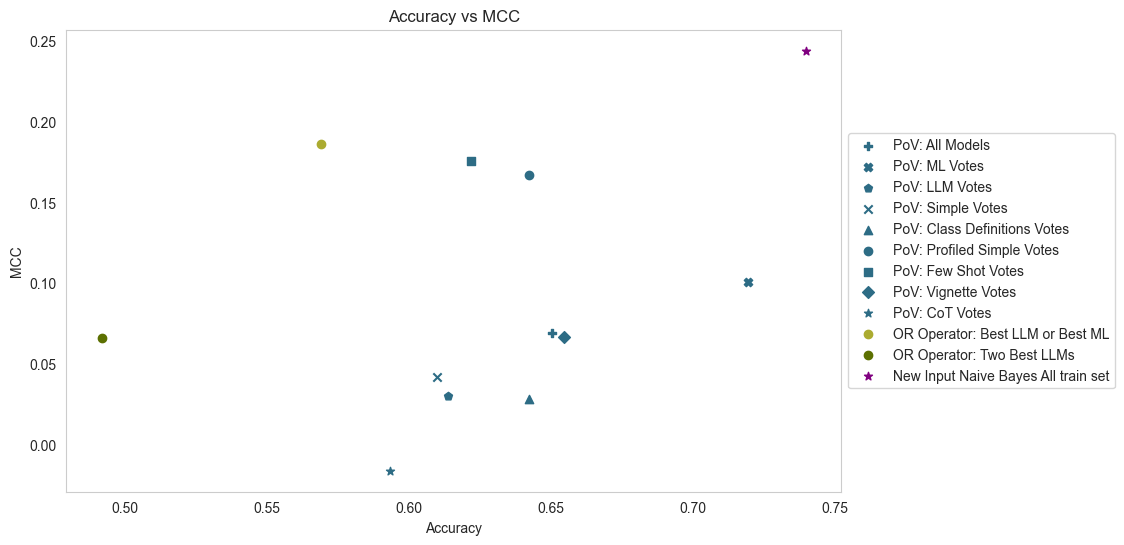

In [132]:
# plot all unification approaches: MCC vs Accuracy
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["accuracy"], metrics_pov_all_models["mcc"], label = "PoV: All Models", color = hex_colors[6], marker = "P")
plt.scatter(metrics_pov_ml_votes["accuracy"], metrics_pov_ml_votes["mcc"], label = "PoV: ML Votes", color = hex_colors[6], marker = "X")
plt.scatter(metrics_pov_llm_votes["accuracy"], metrics_pov_llm_votes["mcc"], label = "PoV: LLM Votes", color = hex_colors[6], marker = "p")
plt.scatter(metrics_pov_simple_votes["accuracy"], metrics_pov_simple_votes["mcc"], label = "PoV: Simple Votes", color = hex_colors[6], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["accuracy"], metrics_pov_class_definitions_votes["mcc"], label = "PoV: Class Definitions Votes", color = hex_colors[6], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["accuracy"], metrics_pov_profiled_simple_votes["mcc"], label = "PoV: Profiled Simple Votes", color = hex_colors[6], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["accuracy"], metrics_pov_few_shot_votes["mcc"], label = "PoV: Few Shot Votes", color = hex_colors[6], marker = "s")
plt.scatter(metrics_pov_vignette_votes["accuracy"], metrics_pov_vignette_votes["mcc"], label = "PoV: Vignette Votes", color = hex_colors[6], marker = "D")
plt.scatter(metrics_pov_cot_votes["accuracy"], metrics_pov_cot_votes["mcc"], label = "PoV: CoT Votes", color = hex_colors[6], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["accuracy"], metrics_best_LLM_or_best_ML["mcc"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
plt.scatter(metrics_OR_best_LLMs["accuracy"], metrics_OR_best_LLMs["mcc"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")

# plt.scatter(metrics_new_input_dnn["accuracy"], metrics_new_input_dnn["mcc"], label = "New Input: DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["accuracy"], metrics_new_input_svc["mcc"], label = "New Input: SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["accuracy"], metrics_new_input_nb["mcc"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

# plt.xlim(0.3, 0.7)
# plt.ylim(-0.05, 0.25)

plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/accuracy_mcc_unification.png", dpi = 300, bbox_inches = "tight")

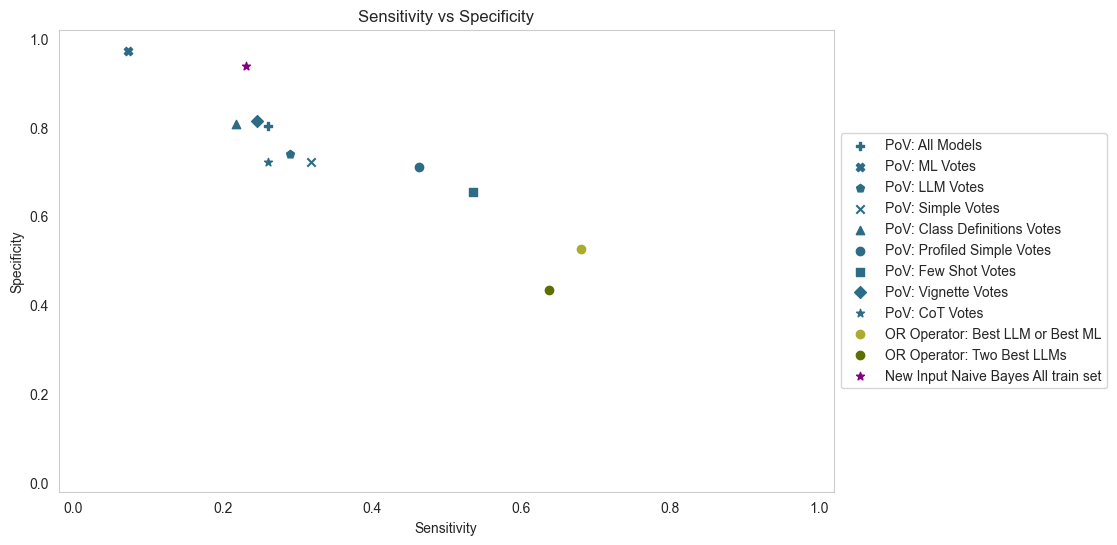

In [133]:
# plot sensitivity vs specificity for all unification approaches
plt.figure(figsize = (10, 6))

plt.scatter(metrics_pov_all_models["sensitivity"], metrics_pov_all_models["specificity"], label = "PoV: All Models", color = hex_colors[6], marker = "P")
plt.scatter(metrics_pov_ml_votes["sensitivity"], metrics_pov_ml_votes["specificity"], label = "PoV: ML Votes", color = hex_colors[6], marker = "X")
plt.scatter(metrics_pov_llm_votes["sensitivity"], metrics_pov_llm_votes["specificity"], label = "PoV: LLM Votes", color = hex_colors[6], marker = "p")
plt.scatter(metrics_pov_simple_votes["sensitivity"], metrics_pov_simple_votes["specificity"], label = "PoV: Simple Votes", color = hex_colors[6], marker = "x")
plt.scatter(metrics_pov_class_definitions_votes["sensitivity"], metrics_pov_class_definitions_votes["specificity"], label = "PoV: Class Definitions Votes", color = hex_colors[6], marker = "^")
plt.scatter(metrics_pov_profiled_simple_votes["sensitivity"], metrics_pov_profiled_simple_votes["specificity"], label = "PoV: Profiled Simple Votes", color = hex_colors[6], marker = "o")
plt.scatter(metrics_pov_few_shot_votes["sensitivity"], metrics_pov_few_shot_votes["specificity"], label = "PoV: Few Shot Votes", color = hex_colors[6], marker = "s")
plt.scatter(metrics_pov_vignette_votes["sensitivity"], metrics_pov_vignette_votes["specificity"], label = "PoV: Vignette Votes", color = hex_colors[6], marker = "D")
plt.scatter(metrics_pov_cot_votes["sensitivity"], metrics_pov_cot_votes["specificity"], label = "PoV: CoT Votes", color = hex_colors[6], marker = "*")

plt.scatter(metrics_best_LLM_or_best_ML["sensitivity"], metrics_best_LLM_or_best_ML["specificity"], label = "OR Operator: Best LLM or Best ML", color = hex_colors[8], marker = "o")
plt.scatter(metrics_OR_best_LLMs["sensitivity"], metrics_OR_best_LLMs["specificity"], label = "OR Operator: Two Best LLMs", color = hex_colors[9], marker = "o")

# plt.scatter(metrics_new_input_dnn["sensitivity"], metrics_new_input_dnn["specificity"], label = "New Input: DNN", color = "green", marker = "s")
# plt.scatter(metrics_new_input_svc["sensitivity"], metrics_new_input_svc["specificity"], label = "New Input: SVC", color = "orange", marker = "D")
plt.scatter(metrics_new_input_nb["sensitivity"], metrics_new_input_nb["specificity"], label = "New Input Naive Bayes All train set", color = "purple", marker = "*")

plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)

plt.xlabel("Sensitivity")
plt.ylabel("Specificity")
plt.title("Sensitivity vs Specificity")
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.grid()

# # save as png
plt.savefig("../doc/figs/02_unification_performance/sensitivity_specificity_unification.png", dpi = 300, bbox_inches = "tight")

# 3 Sensitivity vs Specificity

In [134]:
model_names = [
    "Logistic Regression", "Random Forest", "Support Vector Machine",
    "Deep Neural Network", "Naive Bayes", "KNN",
    "GPT-4.1 Simple Prompt", "GPT-4.1 Class Definitions Prompt",
    "GPT-4.1 Profiled Simple Prompt", "GPT-4.1 Few Shot Prompt",
    "GPT-4.1 Vignette Prompt", "GPT-4.1 COT Prompt",
    "GPT-o3 Simple Prompt", "GPT-o3 Class Definitions Prompt",
    "GPT-o3 Profiled Simple Prompt", "GPT-o3 Few Shot Prompt",
    "GPT-o3 Vignette Prompt", "GPT-o3 COT Prompt",
    "Gemini Simple Prompt", "Gemini Class Definitions Prompt",
    "Gemini Profiled Simple Prompt", "Gemini Few Shot Prompt",
    "Gemini Vignette Prompt", "Gemini COT Prompt",
    "Gemma Simple Prompt", "Gemma Class Definitions Prompt",
    "Gemma Profiled Simple Prompt", "Gemma Few Shot Prompt",
    "Gemma Vignette Prompt", "Gemma COT Prompt",
    "Claude 4 Simple Prompt", "Claude 4 Class Definitions Prompt",
    "Claude 4 Profiled Simple Prompt",
    "Claude 4 Few Shot Prompt", "Claude 4 Vignette Prompt",
    "Claude 4 COT Prompt", "DeepSeek Simple Prompt",
    "DeepSeek Class Definitions Prompt", "DeepSeek Profiled Simple Prompt",
    "DeepSeek Few Shot Prompt", "DeepSeek Vignette Prompt",
    "DeepSeek COT Prompt", "Grok Simple Prompt",
    "Grok Class Definitions Prompt", "Grok Profiled Simple Prompt",
    "Grok Few Shot Prompt", "Grok Vignette Prompt",
    "Grok COT Prompt", "POV All Models", "POV ML Votes",
    "POV Simple Votes", "POV Class Definitions Votes",
    "POV Profiled Simple Votes", "POV Few Shot Votes",
    "POV Vignette Votes", "POV COT Votes", "Best LLM or Best ML"
]

In [135]:
metrics = [
    metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn,
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt, metrics_GPT_profiled_simple_prompt,
    metrics_GPT_few_shot_prompt, metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt,
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt,
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt,
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt,
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt,
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt,
    metrics_pov_all_models, metrics_pov_ml_votes, metrics_pov_simple_votes,
    metrics_pov_class_definitions_votes, metrics_pov_profiled_simple_votes,
    metrics_pov_few_shot_votes, metrics_pov_vignette_votes,
    metrics_pov_cot_votes, metrics_best_LLM_or_best_ML
]

In [136]:
# calculate for each model sensitivity + specificity and print it if sensitivity & specificity is each over 0.3
good_models_dic = {}

for idx, model in enumerate(metrics):
    sensitivity = model["sensitivity"]
    specificity = model["specificity"]

    if sensitivity > 0.3 and specificity > 0.3:
        good_models_dic[model_names[idx]] = {
            "sensitivity + specificity": sensitivity + specificity,
            "sensitivity": sensitivity,
            "specificity": specificity
        }

    # sort the dictionary by sensitivity + specificity
good_models_dic = dict(sorted(good_models_dic.items(), key=lambda item: item[1]["sensitivity + specificity"], reverse = True))
# print the good models
for model, metrics in good_models_dic.items():
    print(f"{model}: Sensitivity + Specificity: {metrics['sensitivity + specificity']:.2f}, Sensitivity: {metrics['sensitivity']:.2f}, Specificity: {metrics['specificity']:.2f}")

Best LLM or Best ML: Sensitivity + Specificity: 1.21, Sensitivity: 0.68, Specificity: 0.53
Grok Few Shot Prompt: Sensitivity + Specificity: 1.19, Sensitivity: 0.70, Specificity: 0.50
POV Few Shot Votes: Sensitivity + Specificity: 1.19, Sensitivity: 0.54, Specificity: 0.66
POV Profiled Simple Votes: Sensitivity + Specificity: 1.18, Sensitivity: 0.46, Specificity: 0.71
Grok Profiled Simple Prompt: Sensitivity + Specificity: 1.17, Sensitivity: 0.83, Specificity: 0.34
Grok Vignette Prompt: Sensitivity + Specificity: 1.16, Sensitivity: 0.51, Specificity: 0.66
GPT-o3 Few Shot Prompt: Sensitivity + Specificity: 1.16, Sensitivity: 0.46, Specificity: 0.69
Gemini Few Shot Prompt: Sensitivity + Specificity: 1.15, Sensitivity: 0.52, Specificity: 0.63
Gemini Profiled Simple Prompt: Sensitivity + Specificity: 1.13, Sensitivity: 0.49, Specificity: 0.64
DeepSeek Vignette Prompt: Sensitivity + Specificity: 1.12, Sensitivity: 0.35, Specificity: 0.77
DeepSeek Few Shot Prompt: Sensitivity + Specificity: 1

In [137]:
gpt_4_metrics = [
    metrics_GPT_simple_prompt, metrics_GPT_class_def_prompt,
    metrics_GPT_profiled_simple_prompt, metrics_GPT_few_shot_prompt,
    metrics_GPT_vignette_prompt, metrics_GPT_cot_prompt
]

gpt_4_metrics =[
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt,
    metrics_GPT_o3_profiled_simple_prompt, metrics_GPT_o3_few_shot_prompt,
    metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt

]

gemini_metrics = [
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt,
    metrics_Gemini_profiled_simple_prompt, metrics_Gemini_few_shot_prompt,
    metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt
]

gemma_metrics = [
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt,
    metrics_Gemma_profiled_simple_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt
]

claude_metrics = [
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_Claude_4_few_shot_prompt,
    metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt
]

deepseek_metrics = [
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt,
    metrics_DeepSeek_profiled_simple_prompt, metrics_DeepSeek_few_shot_prompt,
    metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt
]

grok_metrics = [
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt,
    metrics_Grok_profiled_simple_prompt, metrics_Grok_few_shot_prompt,
    metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt
]

In [138]:
# calculate the average sensitivity and specificity of the GPT, Gemini etc
avg_sensitivity = {}
avg_specificity = {}
avg_mcc = {}
avg_spec_sens = {}

for model_name, model_metrics in zip(
        ["GPT-4.1", "GPT-o3", "Gemini", "Gemma", "Claude 4", "DeepSeek", "Grok"],
        [gpt_4_metrics, gpt_4_metrics, gemini_metrics, gemma_metrics, claude_metrics, deepseek_metrics, grok_metrics]
):
    avg_sensitivity[model_name] = np.mean([m["sensitivity"] for m in model_metrics])
    avg_specificity[model_name] = np.mean([m["specificity"] for m in model_metrics])
    avg_mcc[model_name] = np.mean([m["mcc"] for m in model_metrics])
    avg_spec_sens[model_name] = avg_sensitivity[model_name] + avg_specificity[model_name]

# print the average sensitivity and specificity of the GPT, Gemini etc
for model_name in avg_sensitivity.keys():
    print(f"{model_name}: MCC: {avg_mcc[model_name]:.2f}, Sensitivity + Specificity: {avg_spec_sens[model_name]:.2f}, Sensitivity: {avg_sensitivity[model_name]:.2f}, Specificity: {avg_specificity[model_name]:.2f}")


GPT-4.1: MCC: 0.11, Sensitivity + Specificity: 1.09, Sensitivity: 0.23, Specificity: 0.86
GPT-o3: MCC: 0.11, Sensitivity + Specificity: 1.09, Sensitivity: 0.23, Specificity: 0.86
Gemini: MCC: 0.08, Sensitivity + Specificity: 1.09, Sensitivity: 0.38, Specificity: 0.71
Gemma: MCC: 0.03, Sensitivity + Specificity: 1.03, Sensitivity: 0.64, Specificity: 0.39
Claude 4: MCC: 0.02, Sensitivity + Specificity: 1.02, Sensitivity: 0.37, Specificity: 0.65
DeepSeek: MCC: 0.07, Sensitivity + Specificity: 1.05, Sensitivity: 0.27, Specificity: 0.78
Grok: MCC: 0.11, Sensitivity + Specificity: 1.11, Sensitivity: 0.65, Specificity: 0.46


In [139]:
for model_name, model_metrics in zip(
        ["Logistic Regression", "Random Forest", "Support Vector Machine",
         "Deep Neural Network", "Naive Bayes", "KNN"],
        [metrics_lr, metrics_rf, metrics_svc, metrics_dnn, metrics_nb, metrics_knn]):
    print(f"{model_name}: MCC: {model_metrics['mcc']:.2f}, Sensitivity + Specificity: {model_metrics['sensitivity'] + model_metrics['specificity']:.2f}, Sensitivity: {model_metrics['sensitivity']:.2f}, Specificity: {model_metrics['specificity']:.2f}")

Logistic Regression: MCC: 0.20, Sensitivity + Specificity: 1.14, Sensitivity: 0.20, Specificity: 0.93
Random Forest: MCC: 0.20, Sensitivity + Specificity: 1.14, Sensitivity: 0.20, Specificity: 0.93
Support Vector Machine: MCC: 0.18, Sensitivity + Specificity: 1.04, Sensitivity: 0.04, Specificity: 1.00
Deep Neural Network: MCC: 0.18, Sensitivity + Specificity: 1.13, Sensitivity: 0.22, Specificity: 0.92
Naive Bayes: MCC: 0.24, Sensitivity + Specificity: 1.16, Sensitivity: 0.22, Specificity: 0.94
KNN: MCC: -0.01, Sensitivity + Specificity: 1.00, Sensitivity: 0.01, Specificity: 0.98


# 4 Print metrics

In [140]:
print(f"""Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | {round(metrics_lr["accuracy"], 2)} | {round(metrics_lr["mcc"], 2)} | {round(metrics_lr["sensitivity"], 2)} | {round(metrics_lr["specificity"], 2)} | {round(metrics_lr["precision"], 2)} | {round(metrics_lr["macro_f1"], 2)}
Random Forest       | {round(metrics_rf["accuracy"], 2)} | {round(metrics_rf["mcc"], 2)} | {round(metrics_rf["sensitivity"], 2)} | {round(metrics_rf["specificity"], 2)} | {round(metrics_rf["precision"], 2)} | {round(metrics_rf["macro_f1"], 2)}
Support Vector      | {round(metrics_svc["accuracy"], 2)} | {round(metrics_svc["mcc"], 2)} | {round(metrics_svc["sensitivity"], 2)} | {round(metrics_svc["specificity"], 2)} | {round(metrics_svc["precision"], 2)} | {round(metrics_svc["macro_f1"], 2)}
Deep Neural Net     | {round(metrics_dnn["accuracy"], 2)} | {round(metrics_dnn["mcc"], 2)} | {round(metrics_dnn["sensitivity"], 2)} | {round(metrics_dnn["specificity"], 2)} | {round(metrics_dnn["precision"], 2)} | {round(metrics_dnn["macro_f1"], 2)}
Naive Bayes         | {round(metrics_nb["accuracy"], 2)} | {round(metrics_nb["mcc"], 2)} | {round(metrics_nb["sensitivity"], 2)} | {round(metrics_nb["specificity"], 2)} | {round(metrics_nb["precision"], 2)} | {round(metrics_nb["macro_f1"], 2)}
K-Nearest Neighb    | {round(metrics_knn["accuracy"], 2)} | {round(metrics_knn["mcc"], 2)} | {round(metrics_knn["sensitivity"], 2)} | {round(metrics_knn["specificity"], 2)} | {round(metrics_knn["precision"], 2)} | {round(metrics_knn["macro_f1"], 2)}
""")

Metrics for all ML models:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Logistic Regression | 0.73 | 0.2 | 0.2 | 0.93 | 0.54 | 0.57
Random Forest       | 0.73 | 0.2 | 0.2 | 0.93 | 0.54 | 0.57
Support Vector      | 0.73 | 0.18 | 0.04 | 1.0 | 1.0 | 0.52
Deep Neural Net     | 0.72 | 0.18 | 0.22 | 0.92 | 0.5 | 0.57
Naive Bayes         | 0.74 | 0.24 | 0.22 | 0.94 | 0.6 | 0.58
K-Nearest Neighb    | 0.71 | -0.01 | 0.01 | 0.98 | 0.25 | 0.5



In [141]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_simple_prompt["precision"], 2)} | {round(metrics_Gemini_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_simple_prompt["precision"], 2)} | {round(metrics_Gemma_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_simple_prompt["mcc"], 2)} | {round(metrics_Grok_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_simple_prompt["specificity"], 2)} | {round(metrics_Grok_simple_prompt["precision"], 2)} | {round(metrics_Grok_simple_prompt["macro_f1"], 2)}
""")

Metrics for all simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.14 | 0.23 | 0.88 | 0.43 | 0.56
Gemini | 0.63 | 0.06 | 0.29 | 0.77 | 0.33 | 0.53
Gemma  | 0.46 | 0.09 | 0.74 | 0.35 | 0.31 | 0.54
Claude | 0.6 | 0.06 | 0.38 | 0.69 | 0.32 | 0.53
DeepS  | 0.59 | 0.03 | 0.36 | 0.67 | 0.3 | 0.52
Grok   | 0.36 | 0.09 | 0.93 | 0.14 | 0.3 | 0.53



In [142]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_class_definitions_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["mcc"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["specificity"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["precision"], 2)} | {round(metrics_GPT_o3_class_definitions_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemini_class_def_prompt["mcc"], 2)} | {round(metrics_Gemini_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemini_class_def_prompt["specificity"], 2)} | {round(metrics_Gemini_class_def_prompt["precision"], 2)} | {round(metrics_Gemini_class_def_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_class_def_prompt["accuracy"], 2)} | {round(metrics_Gemma_class_def_prompt["mcc"], 2)} | {round(metrics_Gemma_class_def_prompt["sensitivity"], 2)} | {round(metrics_Gemma_class_def_prompt["specificity"], 2)} | {round(metrics_Gemma_class_def_prompt["precision"], 2)} | {round(metrics_Gemma_class_def_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_class_def_prompt["accuracy"], 2)} | {round(metrics_Claude_4_class_def_prompt["mcc"], 2)} | {round(metrics_Claude_4_class_def_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_class_def_prompt["specificity"], 2)} | {round(metrics_Claude_4_class_def_prompt["precision"], 2)} | {round(metrics_Claude_4_class_def_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_class_def_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_class_def_prompt["mcc"], 2)} | {round(metrics_DeepSeek_class_def_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["specificity"], 2)} | {round(metrics_DeepSeek_class_def_prompt["precision"], 2)} | {round(metrics_DeepSeek_class_def_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_class_def_prompt["accuracy"], 2)} | {round(metrics_Grok_class_def_prompt["mcc"], 2)} | {round(metrics_Grok_class_def_prompt["sensitivity"], 2)} | {round(metrics_Grok_class_def_prompt["specificity"], 2)} | {round(metrics_Grok_class_def_prompt["precision"], 2)} | {round(metrics_Grok_class_def_prompt["macro_f1"], 2)}
""")

Metrics for all class definition prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.09 | 0.14 | 0.92 | 0.4 | 0.53
Gemini | 0.66 | 0.1 | 0.28 | 0.81 | 0.37 | 0.54
Gemma  | 0.48 | -0.05 | 0.46 | 0.49 | 0.26 | 0.47
Claude | 0.55 | -0.07 | 0.28 | 0.66 | 0.24 | 0.47
DeepS  | 0.68 | 0.02 | 0.12 | 0.9 | 0.31 | 0.51
Grok   | 0.49 | 0.05 | 0.62 | 0.44 | 0.3 | 0.53



In [143]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["mcc"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["specificity"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["precision"], 2)} | {round(metrics_GPT_o3_profiled_simple_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemini_profiled_simple_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["precision"], 2)} | {round(metrics_Gemma_profiled_simple_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["precision"], 2)} | {round(metrics_Claude_4_profiled_simple_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["mcc"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["specificity"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["precision"], 2)} | {round(metrics_DeepSeek_profiled_simple_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_profiled_simple_prompt["accuracy"], 2)} | {round(metrics_Grok_profiled_simple_prompt["mcc"], 2)} | {round(metrics_Grok_profiled_simple_prompt["sensitivity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["specificity"], 2)} | {round(metrics_Grok_profiled_simple_prompt["precision"], 2)} | {round(metrics_Grok_profiled_simple_prompt["macro_f1"], 2)}
""")

Metrics for all profiled simple prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.72 | 0.18 | 0.23 | 0.9 | 0.48 | 0.57
Gemini | 0.6 | 0.12 | 0.49 | 0.64 | 0.35 | 0.57
Gemma  | 0.28 | 0.0 | 1.0 | 0.0 | 0.28 | 0.5
Claude | 0.55 | 0.06 | 0.49 | 0.57 | 0.31 | 0.53
DeepS  | 0.72 | 0.15 | 0.13 | 0.95 | 0.53 | 0.54
Grok   | 0.48 | 0.17 | 0.83 | 0.34 | 0.33 | 0.59



In [144]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_few_shot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["precision"], 2)} | {round(metrics_GPT_o3_few_shot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemini_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemini_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemini_few_shot_prompt["precision"], 2)} | {round(metrics_Gemini_few_shot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_few_shot_prompt["accuracy"], 2)} | {round(metrics_Gemma_few_shot_prompt["mcc"], 2)} | {round(metrics_Gemma_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_few_shot_prompt["specificity"], 2)} | {round(metrics_Gemma_few_shot_prompt["precision"], 2)} | {round(metrics_Gemma_few_shot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_few_shot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_few_shot_prompt["mcc"], 2)} | {round(metrics_Claude_4_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["specificity"], 2)} | {round(metrics_Claude_4_few_shot_prompt["precision"], 2)} | {round(metrics_Claude_4_few_shot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_few_shot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["precision"], 2)} | {round(metrics_DeepSeek_few_shot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_few_shot_prompt["accuracy"], 2)} | {round(metrics_Grok_few_shot_prompt["mcc"], 2)} | {round(metrics_Grok_few_shot_prompt["sensitivity"], 2)} | {round(metrics_Grok_few_shot_prompt["specificity"], 2)} | {round(metrics_Grok_few_shot_prompt["precision"], 2)} | {round(metrics_Grok_few_shot_prompt["macro_f1"], 2)}
""")

Metrics for all few shot prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.63 | 0.15 | 0.46 | 0.69 | 0.37 | 0.58
Gemini | 0.6 | 0.14 | 0.52 | 0.63 | 0.36 | 0.58
Gemma  | 0.54 | 0.05 | 0.49 | 0.56 | 0.3 | 0.53
Claude | 0.56 | 0.08 | 0.51 | 0.58 | 0.32 | 0.54
DeepS  | 0.64 | 0.12 | 0.38 | 0.74 | 0.36 | 0.56
Grok   | 0.55 | 0.17 | 0.7 | 0.5 | 0.35 | 0.6



In [145]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_vignette_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_vignette_prompt["mcc"], 2)} | {round(metrics_GPT_o3_vignette_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["specificity"], 2)} | {round(metrics_GPT_o3_vignette_prompt["precision"], 2)} | {round(metrics_GPT_o3_vignette_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemini_vignette_prompt["mcc"], 2)} | {round(metrics_Gemini_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemini_vignette_prompt["specificity"], 2)} | {round(metrics_Gemini_vignette_prompt["precision"], 2)} | {round(metrics_Gemini_vignette_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_vignette_prompt["accuracy"], 2)} | {round(metrics_Gemma_vignette_prompt["mcc"], 2)} | {round(metrics_Gemma_vignette_prompt["sensitivity"], 2)} | {round(metrics_Gemma_vignette_prompt["specificity"], 2)} | {round(metrics_Gemma_vignette_prompt["precision"], 2)} | {round(metrics_Gemma_vignette_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_vignette_prompt["accuracy"], 2)} | {round(metrics_Claude_4_vignette_prompt["mcc"], 2)} | {round(metrics_Claude_4_vignette_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_vignette_prompt["specificity"], 2)} | {round(metrics_Claude_4_vignette_prompt["precision"], 2)} | {round(metrics_Claude_4_vignette_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_vignette_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_vignette_prompt["mcc"], 2)} | {round(metrics_DeepSeek_vignette_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["specificity"], 2)} | {round(metrics_DeepSeek_vignette_prompt["precision"], 2)} | {round(metrics_DeepSeek_vignette_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_vignette_prompt["accuracy"], 2)} | {round(metrics_Grok_vignette_prompt["mcc"], 2)} | {round(metrics_Grok_vignette_prompt["sensitivity"], 2)} | {round(metrics_Grok_vignette_prompt["specificity"], 2)} | {round(metrics_Grok_vignette_prompt["precision"], 2)} | {round(metrics_Grok_vignette_prompt["macro_f1"], 2)}
""")

Metrics for all vignette prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.65 | 0.04 | 0.22 | 0.81 | 0.31 | 0.52
Gemini | 0.59 | 0.05 | 0.38 | 0.68 | 0.31 | 0.53
Gemma  | 0.67 | 0.1 | 0.25 | 0.84 | 0.38 | 0.54
Claude | 0.63 | 0.05 | 0.29 | 0.76 | 0.32 | 0.53
DeepS  | 0.65 | 0.12 | 0.35 | 0.77 | 0.38 | 0.56
Grok   | 0.61 | 0.15 | 0.51 | 0.66 | 0.36 | 0.58



In [146]:
# for all prompts and LLMs print the metrics in a table
print(f"""Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(metrics_GPT_o3_cot_prompt["accuracy"], 2)} | {round(metrics_GPT_o3_cot_prompt["mcc"], 2)} | {round(metrics_GPT_o3_cot_prompt["sensitivity"], 2)} | {round(metrics_GPT_o3_cot_prompt["specificity"], 2)} | {round(metrics_GPT_o3_cot_prompt["precision"], 2)} | {round(metrics_GPT_o3_cot_prompt["macro_f1"], 2)}
Gemini | {round(metrics_Gemini_cot_prompt["accuracy"], 2)} | {round(metrics_Gemini_cot_prompt["mcc"], 2)} | {round(metrics_Gemini_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemini_cot_prompt["specificity"], 2)} | {round(metrics_Gemini_cot_prompt["precision"], 2)} | {round(metrics_Gemini_cot_prompt["macro_f1"], 2)}
Gemma  | {round(metrics_Gemma_cot_prompt["accuracy"], 2)} | {round(metrics_Gemma_cot_prompt["mcc"], 2)} | {round(metrics_Gemma_cot_prompt["sensitivity"], 2)} | {round(metrics_Gemma_cot_prompt["specificity"], 2)} | {round(metrics_Gemma_cot_prompt["precision"], 2)} | {round(metrics_Gemma_cot_prompt["macro_f1"], 2)}
Claude | {round(metrics_Claude_4_cot_prompt["accuracy"], 2)} | {round(metrics_Claude_4_cot_prompt["mcc"], 2)} | {round(metrics_Claude_4_cot_prompt["sensitivity"], 2)} | {round(metrics_Claude_4_cot_prompt["specificity"], 2)} | {round(metrics_Claude_4_cot_prompt["precision"], 2)} | {round(metrics_Claude_4_cot_prompt["macro_f1"], 2)}
DeepS  | {round(metrics_DeepSeek_cot_prompt["accuracy"], 2)} | {round(metrics_DeepSeek_cot_prompt["mcc"], 2)} | {round(metrics_DeepSeek_cot_prompt["sensitivity"], 2)} | {round(metrics_DeepSeek_cot_prompt["specificity"], 2)} | {round(metrics_DeepSeek_cot_prompt["precision"], 2)} | {round(metrics_DeepSeek_cot_prompt["macro_f1"], 2)}
Grok   | {round(metrics_Grok_cot_prompt["accuracy"], 2)} | {round(metrics_Grok_cot_prompt["mcc"], 2)} | {round(metrics_Grok_cot_prompt["sensitivity"], 2)} | {round(metrics_Grok_cot_prompt["specificity"], 2)} | {round(metrics_Grok_cot_prompt["precision"], 2)} | {round(metrics_Grok_cot_prompt["macro_f1"], 2)}
""")

Metrics for all CoT prompts and LLMs:

| Model | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.7 | 0.07 | 0.12 | 0.93 | 0.38 | 0.52
Gemini | 0.6 | 0.03 | 0.32 | 0.71 | 0.3 | 0.52
Gemma  | 0.33 | -0.02 | 0.87 | 0.11 | 0.28 | 0.49
Claude | 0.54 | -0.06 | 0.3 | 0.63 | 0.24 | 0.47
DeepS  | 0.56 | -0.05 | 0.29 | 0.66 | 0.25 | 0.48
Grok   | 0.59 | 0.02 | 0.32 | 0.7 | 0.29 | 0.51



In [147]:
def average_prompt_metrics(metrics_GPT, metrics_Gemini, metrics_Gemma, metrics_Claude, metrics_DeepSeek, metrics_Grok):
    accuracy = np.mean([
            metrics_GPT["accuracy"],
            metrics_Gemini["accuracy"],
            metrics_Gemma["accuracy"],
            metrics_Claude["accuracy"],
            metrics_DeepSeek["accuracy"],
            metrics_Grok["accuracy"]
    ])

    mcc = np.mean([
            metrics_GPT["mcc"],
            metrics_Gemini["mcc"],
            metrics_Gemma["mcc"],
            metrics_Claude["mcc"],
            metrics_DeepSeek["mcc"],
            metrics_Grok["mcc"]
    ])

    sensitivity = np.mean([
            metrics_GPT["sensitivity"],
            metrics_Gemini["sensitivity"],
            metrics_Gemma["sensitivity"],
            metrics_Claude["sensitivity"],
            metrics_DeepSeek["sensitivity"],
            metrics_Grok["sensitivity"]
    ])

    specificity = np.mean([
            metrics_GPT["specificity"],
            metrics_Gemini["specificity"],
            metrics_Gemma["specificity"],
            metrics_Claude["specificity"],
            metrics_DeepSeek["specificity"],
            metrics_Grok["specificity"]
    ])

    precision = np.mean([
            metrics_GPT["precision"],
            metrics_Gemini["precision"],
            metrics_Gemma["precision"],
            metrics_Claude["precision"],
            metrics_DeepSeek["precision"],
            metrics_Grok["precision"]
    ])

    macro_f1 = np.mean([
            metrics_GPT["macro_f1"],
            metrics_Gemini["macro_f1"],
            metrics_Gemma["macro_f1"],
            metrics_Claude["macro_f1"],
            metrics_DeepSeek["macro_f1"],
            metrics_Grok["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [148]:
def average_LLM_metrics(metrics_simple, metrics_class_def, metrics_profiled_simple, metrics_few_shot, metrics_vignette, metrics_cot):
    accuracy = np.mean([
        metrics_simple["accuracy"],
        metrics_class_def["accuracy"],
        metrics_profiled_simple["accuracy"],
        metrics_few_shot["accuracy"],
        metrics_vignette["accuracy"],
        metrics_cot["accuracy"]
    ])

    mcc = np.mean([
        metrics_simple["mcc"],
        metrics_class_def["mcc"],
        metrics_profiled_simple["mcc"],
        metrics_few_shot["mcc"],
        metrics_vignette["mcc"],
        metrics_cot["mcc"]
    ])

    sensitivity = np.mean([
        metrics_simple["sensitivity"],
        metrics_class_def["sensitivity"],
        metrics_profiled_simple["sensitivity"],
        metrics_few_shot["sensitivity"],
        metrics_vignette["sensitivity"],
        metrics_cot["sensitivity"]
    ])

    specificity = np.mean([
        metrics_simple["specificity"],
        metrics_class_def["specificity"],
        metrics_profiled_simple["specificity"],
        metrics_few_shot["specificity"],
        metrics_vignette["specificity"],
        metrics_cot["specificity"]
    ])

    precision = np.mean([
        metrics_simple["precision"],
        metrics_class_def["precision"],
        metrics_profiled_simple["precision"],
        metrics_few_shot["precision"],
        metrics_vignette["precision"],
        metrics_cot["precision"]
    ])

    macro_f1 = np.mean([
        metrics_simple["macro_f1"],
        metrics_class_def["macro_f1"],
        metrics_profiled_simple["macro_f1"],
        metrics_few_shot["macro_f1"],
        metrics_vignette["macro_f1"],
        metrics_cot["macro_f1"]
    ])

    return accuracy, mcc, sensitivity, specificity, precision, macro_f1

In [149]:
average_simple_accuracy, average_simple_mcc, average_simple_sensitivity, average_simple_specificity, average_simple_precision, average_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_simple_prompt, metrics_Gemini_simple_prompt, metrics_Gemma_simple_prompt,
    metrics_Claude_4_simple_prompt, metrics_DeepSeek_simple_prompt, metrics_Grok_simple_prompt)

average_class_def_accuracy, average_class_def_mcc, average_class_def_sensitivity, average_class_def_specificity, average_class_def_precision, average_class_def_f1 = average_prompt_metrics(
    metrics_GPT_o3_class_definitions_prompt, metrics_Gemini_class_def_prompt, metrics_Gemma_class_def_prompt, metrics_Claude_4_class_def_prompt, metrics_DeepSeek_class_def_prompt, metrics_Grok_class_def_prompt)

average_profiled_simple_accuracy, average_profiled_simple_mcc, average_profiled_simple_sensitivity, average_profiled_simple_specificity, average_profiled_simple_precision, average_profiled_simple_f1 = average_prompt_metrics(
    metrics_GPT_o3_profiled_simple_prompt, metrics_Gemini_profiled_simple_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Claude_4_profiled_simple_prompt, metrics_DeepSeek_profiled_simple_prompt, metrics_Grok_profiled_simple_prompt)

average_few_shot_accuracy, average_few_shot_mcc, average_few_shot_sensitivity, average_few_shot_specificity, average_few_shot_precision, average_few_shot_f1 = average_prompt_metrics(
    metrics_GPT_o3_few_shot_prompt, metrics_Gemini_few_shot_prompt, metrics_Gemma_few_shot_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_DeepSeek_few_shot_prompt, metrics_Grok_few_shot_prompt)

average_vignette_accuracy, average_vignette_mcc, average_vignette_sensitivity, average_vignette_specificity, average_vignette_precision, average_vignette_f1 = average_prompt_metrics(
    metrics_GPT_o3_vignette_prompt, metrics_Gemini_vignette_prompt, metrics_Gemma_vignette_prompt,
    metrics_Claude_4_vignette_prompt, metrics_DeepSeek_vignette_prompt, metrics_Grok_vignette_prompt)

average_cot_accuracy, average_cot_mcc, average_cot_sensitivity, average_cot_specificity, average_cot_precision, average_cot_f1 = average_prompt_metrics(
    metrics_GPT_o3_cot_prompt, metrics_Gemini_cot_prompt, metrics_Gemma_cot_prompt,
    metrics_Claude_4_cot_prompt, metrics_DeepSeek_cot_prompt, metrics_Grok_cot_prompt)

In [150]:
print(f"""Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | {round(average_simple_accuracy, 2)} | {round(average_simple_mcc, 2)} | {round(average_simple_sensitivity, 2)} | {round(average_simple_specificity, 2)} | {round(average_simple_precision, 2)} | {round(average_simple_f1, 2)}
Class def prompt | {round(average_class_def_accuracy, 2)} | {round(average_class_def_mcc, 2)} | {round(average_class_def_sensitivity, 2)} | {round(average_class_def_specificity, 2)} | {round(average_class_def_precision, 2)} | {round(average_class_def_f1, 2)}
Profiled prompt  | {round(average_profiled_simple_accuracy, 2)} | {round(average_profiled_simple_mcc, 2)} | {round(average_profiled_simple_sensitivity, 2)} | {round(average_profiled_simple_specificity, 2)} | {round(average_profiled_simple_precision, 2)} | {round(average_profiled_simple_f1, 2)}
Few shot prompt  | {round(average_few_shot_accuracy, 2)} | {round(average_few_shot_mcc, 2)} | {round(average_few_shot_sensitivity, 2)} | {round(average_few_shot_specificity, 2)} | {round(average_few_shot_precision, 2)} | {round(average_few_shot_f1, 2)}
Vignette prompt  | {round(average_vignette_accuracy, 2)} | {round(average_vignette_mcc, 2)} | {round(average_vignette_sensitivity, 2)} | {round(average_vignette_specificity, 2)} | {round(average_vignette_precision, 2)} | {round(average_vignette_f1, 2)}
CoT prompt       | {round(average_cot_accuracy, 2)} | {round(average_cot_mcc, 2)} | {round(average_cot_sensitivity, 2)} | {round(average_cot_specificity, 2)} | {round(average_cot_precision, 2)} | {round(average_cot_f1, 2)}
""")

Average metrics for all prompts and LLMs:

Prompt | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
Simple prompt    | 0.56 | 0.08 | 0.49 | 0.58 | 0.33 | 0.54
Class def prompt | 0.59 | 0.02 | 0.32 | 0.7 | 0.31 | 0.51
Profiled prompt  | 0.56 | 0.11 | 0.53 | 0.57 | 0.38 | 0.55
Few shot prompt  | 0.59 | 0.12 | 0.51 | 0.62 | 0.34 | 0.56
Vignette prompt  | 0.64 | 0.09 | 0.33 | 0.75 | 0.34 | 0.54
CoT prompt       | 0.55 | -0.0 | 0.37 | 0.62 | 0.29 | 0.5



In [151]:
average_GPT_o3_accuracy, average_GPT_o3_mcc, average_GPT_o3_sensitivity, average_GPT_o3_specificity, average_GPT_o3_precision, average_GPT_o3_f1 = average_LLM_metrics(
    metrics_GPT_o3_simple_prompt, metrics_GPT_o3_class_definitions_prompt, metrics_GPT_o3_profiled_simple_prompt,
    metrics_GPT_o3_few_shot_prompt, metrics_GPT_o3_vignette_prompt, metrics_GPT_o3_cot_prompt)

average_Gemini_accuracy, average_Gemini_mcc, average_Gemini_sensitivity, average_Gemini_specificity, average_Gemini_precision, average_Gemini_f1 = average_LLM_metrics(
    metrics_Gemini_simple_prompt, metrics_Gemini_class_def_prompt, metrics_Gemini_profiled_simple_prompt,
    metrics_Gemini_few_shot_prompt, metrics_Gemini_vignette_prompt, metrics_Gemini_cot_prompt)

average_Gemma_accuracy, average_Gemma_mcc, average_Gemma_sensitivity, average_Gemma_specificity, average_Gemma_precision, average_Gemma_f1 = average_LLM_metrics(
    metrics_Gemma_simple_prompt, metrics_Gemma_class_def_prompt, metrics_Gemma_profiled_simple_prompt,
    metrics_Gemma_few_shot_prompt, metrics_Gemma_vignette_prompt, metrics_Gemma_cot_prompt)

average_Claude_accuracy, average_Claude_mcc, average_Claude_sensitivity, average_Claude_specificity, average_Claude_precision, average_Claude_f1 = average_LLM_metrics(
    metrics_Claude_4_simple_prompt, metrics_Claude_4_class_def_prompt, metrics_Claude_4_profiled_simple_prompt,
    metrics_Claude_4_few_shot_prompt, metrics_Claude_4_vignette_prompt, metrics_Claude_4_cot_prompt)

average_DeepSeek_accuracy, average_DeepSeek_mcc, average_DeepSeek_sensitivity, average_DeepSeek_specificity, average_DeepSeek_precision, average_DeepSeek_f1 = average_LLM_metrics(
    metrics_DeepSeek_simple_prompt, metrics_DeepSeek_class_def_prompt, metrics_DeepSeek_profiled_simple_prompt,
    metrics_DeepSeek_few_shot_prompt, metrics_DeepSeek_vignette_prompt, metrics_DeepSeek_cot_prompt)

average_Grok_accuracy, average_Grok_mcc, average_Grok_sensitivity, average_Grok_specificity, average_Grok_precision, average_Grok_f1 = average_LLM_metrics(
    metrics_Grok_simple_prompt, metrics_Grok_class_def_prompt, metrics_Grok_profiled_simple_prompt,
    metrics_Grok_few_shot_prompt, metrics_Grok_vignette_prompt, metrics_Grok_cot_prompt)

In [152]:
print(f"""Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | {round(average_GPT_o3_accuracy, 2)} | {round(average_GPT_o3_mcc, 2)} | {round(average_GPT_o3_sensitivity, 2)} | {round(average_GPT_o3_specificity, 2)} | {round(average_GPT_o3_precision, 2)} | {round(average_GPT_o3_f1, 2)}
Gemini | {round(average_Gemini_accuracy, 2)} | {round(average_Gemini_mcc, 2)} | {round(average_Gemini_sensitivity, 2)} | {round(average_Gemini_specificity, 2)} | {round(average_Gemini_precision, 2)} | {round(average_Gemini_f1, 2)}
Gemma  | {round(average_Gemma_accuracy, 2)} | {round(average_Gemma_mcc, 2)} | {round(average_Gemma_sensitivity, 2)} | {round(average_Gemma_specificity, 2)} | {round(average_Gemma_precision, 2)} | {round(average_Gemma_f1, 2)}
Claude | {round(average_Claude_accuracy, 2)} | {round(average_Claude_mcc, 2)} | {round(average_Claude_sensitivity, 2)} | {round(average_Claude_specificity, 2)} | {round(average_Claude_precision, 2)} | {round(average_Claude_f1, 2)}
DeepS  | {round(average_DeepSeek_accuracy, 2)} | {round(average_DeepSeek_mcc, 2)} | {round(average_DeepSeek_sensitivity, 2)} | {round(average_DeepSeek_specificity, 2)} | {round(average_DeepSeek_precision, 2)} | {round(average_DeepSeek_f1, 2)}
Grok   | {round(average_Grok_accuracy, 2)} | {round(average_Grok_mcc, 2)} | {round(average_Grok_sensitivity, 2)} | {round(average_Grok_specificity, 2)} | {round(average_Grok_precision, 2)} | {round(average_Grok_f1, 2)}
""")

Average metrics for all LLMs:

LLM | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
GPT-o3 | 0.68 | 0.11 | 0.23 | 0.86 | 0.4 | 0.55
Gemini | 0.62 | 0.08 | 0.38 | 0.71 | 0.34 | 0.54
Gemma  | 0.46 | 0.03 | 0.64 | 0.39 | 0.3 | 0.51
Claude | 0.57 | 0.02 | 0.37 | 0.65 | 0.29 | 0.51
DeepS  | 0.64 | 0.07 | 0.27 | 0.78 | 0.35 | 0.53
Grok   | 0.51 | 0.11 | 0.65 | 0.46 | 0.32 | 0.56



In [153]:
print(f"""Metrics for all Unification Approaches:

Method | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
New Input NB   | {round(metrics_new_input_nb["accuracy"], 2)} | {round(metrics_new_input_nb["mcc"], 2)} | {round(metrics_new_input_nb["sensitivity"], 2)} | {round(metrics_new_input_nb["specificity"], 2)} | {round(metrics_new_input_nb["precision"], 2)} | {round(metrics_new_input_nb["macro_f1"], 2)}
POV: All       | {round(metrics_pov_all_models["accuracy"], 2)} | {round(metrics_pov_all_models["mcc"], 2)} | {round(metrics_pov_all_models["sensitivity"], 2)} | {round(metrics_pov_all_models["specificity"], 2)} | {round(metrics_pov_all_models["precision"], 2)} | {round(metrics_pov_all_models["macro_f1"], 2)}
POV: ML        | {round(metrics_pov_ml_votes["accuracy"], 2)} | {round(metrics_pov_ml_votes["mcc"], 2)} | {round(metrics_pov_ml_votes["sensitivity"], 2)} | {round(metrics_pov_ml_votes["specificity"], 2)} | {round(metrics_pov_ml_votes["precision"], 2)} | {round(metrics_pov_ml_votes["macro_f1"], 2)}
POV: LLMs      | {round(metrics_pov_llm_votes["accuracy"], 2)} | {round(metrics_pov_llm_votes["mcc"], 2)} | {round(metrics_pov_llm_votes["sensitivity"], 2)} | {round(metrics_pov_llm_votes["specificity"], 2)} | {round(metrics_pov_llm_votes["precision"], 2)} | {round(metrics_pov_llm_votes["macro_f1"], 2)}
POV: Simple    | {round(metrics_pov_simple_votes["accuracy"], 2)} | {round(metrics_pov_simple_votes["mcc"], 2)} | {round(metrics_pov_simple_votes["sensitivity"], 2)} | {round(metrics_pov_simple_votes["specificity"], 2)} | {round(metrics_pov_simple_votes["precision"], 2)} | {round(metrics_pov_simple_votes["macro_f1"], 2)}
POV: Class Def | {round(metrics_pov_class_definitions_votes["accuracy"], 2)} | {round(metrics_pov_class_definitions_votes["mcc"], 2)} | {round(metrics_pov_class_definitions_votes["sensitivity"], 2)} | {round(metrics_pov_class_definitions_votes["specificity"], 2)} | {round(metrics_pov_class_definitions_votes["precision"], 2)} | {round(metrics_pov_class_definitions_votes["macro_f1"], 2)}
POV: Profiled  | {round(metrics_pov_profiled_simple_votes["accuracy"], 2)} | {round(metrics_pov_profiled_simple_votes["mcc"], 2)} | {round(metrics_pov_profiled_simple_votes["sensitivity"], 2)} | {round(metrics_pov_profiled_simple_votes["specificity"], 2)} | {round(metrics_pov_profiled_simple_votes["precision"], 2)} | {round(metrics_pov_profiled_simple_votes["macro_f1"], 2)}
POV: Few Shot  | {round(metrics_pov_few_shot_votes["accuracy"], 2)} | {round(metrics_pov_few_shot_votes["mcc"], 2)} | {round(metrics_pov_few_shot_votes["sensitivity"], 2)} | {round(metrics_pov_few_shot_votes["specificity"], 2)} | {round(metrics_pov_few_shot_votes["precision"], 2)} | {round(metrics_pov_few_shot_votes["macro_f1"], 2)}
POV: Vignette  | {round(metrics_pov_vignette_votes["accuracy"], 2)} | {round(metrics_pov_vignette_votes["mcc"], 2)} | {round(metrics_pov_vignette_votes["sensitivity"], 2)} | {round(metrics_pov_vignette_votes["specificity"], 2)} | {round(metrics_pov_vignette_votes["precision"], 2)} | {round(metrics_pov_vignette_votes["macro_f1"], 2)}
POV: CoT       | {round(metrics_pov_cot_votes["accuracy"], 2)} | {round(metrics_pov_cot_votes["mcc"], 2)} | {round(metrics_pov_cot_votes["sensitivity"], 2)} | {round(metrics_pov_cot_votes["specificity"], 2)} | {round(metrics_pov_cot_votes["precision"], 2)} | {round(metrics_pov_cot_votes["macro_f1"], 2)}
Best ML OR LLM | {round(metrics_best_LLM_or_best_ML["accuracy"], 2)} | {round(metrics_best_LLM_or_best_ML["mcc"], 2)} | {round(metrics_best_LLM_or_best_ML["sensitivity"], 2)} | {round(metrics_best_LLM_or_best_ML["specificity"], 2)} | {round(metrics_best_LLM_or_best_ML["precision"], 2)} | {round(metrics_best_LLM_or_best_ML["macro_f1"], 2)}
""")

Metrics for all Unification Approaches:

Method | Accuracy | MCC | Sensitivity | Specificity | Precision | F1 |
New Input NB   | 0.74 | 0.24 | 0.23 | 0.94 | 0.59 | 0.58
POV: All       | 0.65 | 0.07 | 0.26 | 0.8 | 0.34 | 0.53
POV: ML        | 0.72 | 0.1 | 0.07 | 0.97 | 0.5 | 0.52
POV: LLMs      | 0.61 | 0.03 | 0.29 | 0.74 | 0.3 | 0.51
POV: Simple    | 0.61 | 0.04 | 0.32 | 0.72 | 0.31 | 0.52
POV: Class Def | 0.64 | 0.03 | 0.22 | 0.81 | 0.31 | 0.51
POV: Profiled  | 0.64 | 0.17 | 0.46 | 0.71 | 0.39 | 0.59
POV: Few Shot  | 0.62 | 0.18 | 0.54 | 0.66 | 0.38 | 0.6
POV: Vignette  | 0.65 | 0.07 | 0.25 | 0.81 | 0.34 | 0.53
POV: CoT       | 0.59 | -0.02 | 0.26 | 0.72 | 0.27 | 0.49
Best ML OR LLM | 0.57 | 0.19 | 0.68 | 0.53 | 0.36 | 0.6

